In [1]:
# Initialize Notebook
from IPython.core.display import HTML,Image
#%run ../library/v1.0.5/init.ipy
HTML('''<script> code_show=true;  function code_toggle() {  if (code_show){  $('div.input').hide();  } else {  $('div.input').show();  }  code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [2]:
import gc, argparse, sys, os, errno
from IPython.core.display import HTML,Image
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [3]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf', metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()
    
from base64 import b64encode, b64decode
from io import StringIO, BytesIO

fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax

def gradient_func(val):
    return '<span style="background: linear-gradient(90deg, #d65f5f {0}%, transparent 0%)">{0:.3f}</span>'.format(val)

def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button',gradientfunc=False, **kwargs):
    #display(df)
    #if isinstance(df, pd.DataFrame):
    #    display(df.style.set_caption(filename))
    #else:
    if gradientfunc == False:
        display(df.style.set_caption(filename))    
    else:
        display(df.style.format(gradient_func).set_caption(filename)) 
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href=" " download={filename} target="_blank">{filename}</a >'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [4]:
cd ~/ex

/home/xieyufeng/ex


In [5]:
dataset='scirep'
reads_preprocess  = True # if start from preprocessing
sequencing_type = 'short'   #short long domain_only transcript
example_cancer = 'Normal-CRC'

file_counts = 'output/'+dataset+'/summary/read_counts.txt'
file_length_path = 'output/'+dataset+'/stats/mapped_read_length_by_sample/'
file_length_path_insert = 'output/'+dataset+'/stats/mapped_insert_size_by_sample/'
plot_save_path = 'output/'+dataset+'/plots/'
if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'
    
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+dataset+'.'+sequencing_type+'.'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

# Basic plot

In [6]:
#Get table
def get_counts_ratio_table(file_counts,sequencing_type='short'):
    df = pd.read_table(file_counts, index_col=0)
    if reads_preprocess == True:
        if sequencing_type == 'short':
            rna_types = [s.split('.')[0] for s in df.index.tolist() if s.endswith('.mapped')]
            rna_types = 'rRNA,miRNA,piRNA,Y_RNA,srpRNA,tRNA,snRNA,snoRNA,lncRNA,mRNA,tucpRNA,intron,promoter,enhancer,repeats,circRNA,other'.split(',')
            mapped_ratio = {}
            mapped_count = {}
            for sample_id in df.columns.tolist():
                mapped_ratio[sample_id] = {}
                mapped_count[sample_id] = {}
                clean_counts = float(df.loc['clean.unmapped', sample_id])
                for rna_type in rna_types:
                    mapped_ratio[sample_id][rna_type] = df.loc[rna_type + '.mapped', sample_id]/(
                        clean_counts - df.loc['other.unmapped', sample_id])
                    mapped_count[sample_id][rna_type] = df.loc[rna_type + '.mapped', sample_id]
                for region in ('promoter', 'enhancer', 'intron','repeats','circRNA'):
                    mapped_ratio[sample_id]['other'] -= mapped_ratio[sample_id][region]
                    mapped_count[sample_id]['other'] -= mapped_count[sample_id][region]
            mapped_count = pd.DataFrame.from_records(mapped_count)        
            mapped_ratio = pd.DataFrame.from_records(mapped_ratio)
            mapped_count = mapped_count.loc[rna_types, :]
            mapped_ratio = mapped_ratio.loc[rna_types, :]
            return df,mapped_count.T, mapped_ratio.T
        elif sequencing_type =='long':
            index_1 = np.array(['rRNA','genome','remove_duplicates'])
            index_2 = np.array(['Y_RNA','circRNA','lncRNA','mRNA','snRNA','snoRNA','srpRNA','tucpRNA'])
            mapped_count_1 = df.loc[index_1]
            mapped_ratio_1 = mapped_count_1/df.loc['clean']
            mapped_count_2 = df.loc[index_2]
            mapped_ratio_2 = mapped_count_2/df.loc['remove_duplicates']
            return df,mapped_count_1.T, mapped_ratio_1.T,mapped_count_2.T, mapped_ratio_2.T
    else:
        if sequencing_type == 'short':
            pass
        elif sequencing_type =='long':
            read_counts = pd.read_table(file_counts, index_col=0)
            read_counts = read_counts.T

            rna_types = read_counts.columns.tolist()
            rna_types.remove('clean')
            rna_types_included = list(rna_types)
            for rna_type in ('genome', 'rRNA'):
                rna_types_included.remove(rna_type)

            # percentage by clean reads
            #display(read_counts.style.set_caption('Read counts'))

            percent_by_clean = read_counts.loc[:, ['clean', 'rRNA', 'genome', 'circRNA']].copy()
            percent_by_clean = 100.0*percent_by_clean.div(percent_by_clean.loc[:, 'clean'], axis=0)
            percent_by_clean.drop(columns='clean', inplace=True)
            percent_by_clean['unmapped'] = 100 - percent_by_clean.sum(axis=1)
            #display(percent_by_clean.style.format(gradient_func).set_caption('Percentage by clean reads'))

            percent_by_mapped = read_counts.copy()
            percent_by_mapped = 100.0*percent_by_mapped.div(percent_by_mapped.loc[:, ['genome', 'circRNA']].sum(axis=1), axis=0)
            percent_by_mapped.drop(columns=['rRNA', 'genome', 'clean'], inplace=True)
            percent_by_mapped['other'] = 100.0 - percent_by_mapped.sum(axis=1)
            #display(percent_by_mapped.style.format(gradient_func).set_caption('Percentage by mapped reads'))
            return read_counts,percent_by_clean,percent_by_mapped
        

In [7]:
def get_length_table(file_length_path,sequencing_type='short'):
    length_table = {}
    for i in os.listdir(file_length_path):
        if sequencing_type =='short':
            length_table[i] = pd.read_table(file_length_path+i,index_col=0).iloc[16:52]
        elif sequencing_type =='long':
            length_table[i] = pd.read_table(file_length_path+i,index_col=0).iloc[16:152]
    sample_names = np.array(os.listdir(file_length_path))
    length_table_sum = length_table[sample_names[0]]
    for i in sample_names[1:]:
        length_table_sum += length_table[i]
    return length_table_sum/length_table_sum.sum(axis=0)

In [8]:
if reads_preprocess == True:
    if sequencing_type == 'short': 
        read_counts,table_count, table_ratio = get_counts_ratio_table(file_counts)
        length_table = get_length_table(file_length_path,sequencing_type=sequencing_type)
        rnanames=np.array(table_ratio.columns).astype('str')
    elif sequencing_type == 'long': 
        read_counts,table_count_1, table_ratio_1,table_count_2, table_ratio_2 = \
                        get_counts_ratio_table(file_counts,sequencing_type='long')
        rnanames_1=np.array(table_ratio_1.columns).astype('str')
        rnanames_2=np.array(table_ratio_2.columns).astype('str')
        length_table_1 = get_length_table(file_length_path,sequencing_type=sequencing_type)
        length_table_2 = get_length_table(file_length_path_insert,sequencing_type=sequencing_type)
else:
    if sequencing_type == 'short': 
        pass
    elif sequencing_type == 'long': 
        read_counts,percent_by_clean,percent_by_mapped = \
                        get_counts_ratio_table(file_counts,sequencing_type='long')
        rnanames_1=np.array(percent_by_clean.columns).astype('str')
        rnanames_2=np.array(percent_by_mapped.columns).astype('str')
        length_table_1 = get_length_table(file_length_path,sequencing_type=sequencing_type)
        length_table_2 = get_length_table(file_length_path_insert,sequencing_type=sequencing_type)

In [9]:
if reads_preprocess == True:
    if sequencing_type == 'short': 
        table_percent = table_ratio*100
        display_dataframe(table_count,filename='Mapped counts',gradientfunc=False)
        display_dataframe(table_percent,filename='Percentage by clean reads',gradientfunc=True)
    elif sequencing_type == 'long': 
        table_percent_1,table_percent_2 = table_ratio_1*100, table_ratio_2*100
        display_dataframe(table_count_1,filename='Mapped counts 1',gradientfunc=False)
        display_dataframe(table_count_2,filename='Mapped counts 2',gradientfunc=False)
        display_dataframe(table_percent_1,filename='Percentage by clean reads 1',gradientfunc=True)
        display_dataframe(table_percent_2,filename='Percentage by clean reads 2',gradientfunc=True)
else:
    if sequencing_type == 'short': 
        pass
    elif sequencing_type == 'long': 
        display_dataframe(read_counts,filename='Read counts',gradientfunc=False)
        display_dataframe(percent_by_clean,filename='Percentage by clean reads',gradientfunc=True)
        display_dataframe(percent_by_mapped,filename='Percentage by mapped reads',gradientfunc=True)

## pie plot of RNA ratio

In [10]:
def plot_pie(data, rnanames):
    '''
    data: table_ratio
    rnanames: rna type names
    adjustment: merge RNA with small percent together
    '''
    from bokeh.io import output_file, show
    from bokeh.palettes import Category20
    from bokeh.plotting import figure
    from bokeh.transform import cumsum
    x = np.array(rnanames)
    y = np.array(data.loc[:,x].mean())+10e-8
    z_ = np.array([x[i] + str(' {:.2f}'.format(y[i]*100)+'%') for i in range(y.shape[0])])
    z = np.array([float('{:.10f}'.format(y[i]*100)) for i in range(y.shape[0])])
    labels = rnanames
    dataframe = pd.DataFrame(np.concatenate((x.reshape(-1,1),z.reshape(-1,1),z_.reshape(-1,1)),axis=1))
    dataframe.columns=['rna','percent','label']
    dataframe["percent"] = pd.to_numeric(dataframe["percent"])
    dataframe['angle'] = dataframe['percent']/dataframe['percent'].sum() * 2*pi
    dataframe['color'] = Category20[len(x)]
    p = figure(plot_height=500, title="Pie Chart", toolbar_location=None,
               tools="hover", tooltips="@label", x_range=(-0.5, 1.0))
    p.wedge(x=0.14, y=1, radius=0.45,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="black", fill_color='color', legend="label", source=dataframe)
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None
    show(p)
def plot_for_pie(sequencing_type='short',by_sample=False):
    if by_sample:
        if sequencing_type == 'short': 
            for i in range(table_ratio.shape[0]):
                plot_pie(pd.DataFrame(table_ratio.iloc[i]).T, rnanames)
        elif sequencing_type == 'long': 
            for i in range(table_ratio.shape[0]):
                plot_pie(pd.DataFrame(table_ratio_1.iloc[i]).T, rnanames_1)
                plot_pie(pd.DataFrame(table_ratio_2.iloc[i]).T, rnanames_2)
    else:
        if sequencing_type == 'short': 
            plot_pie(table_ratio, rnanames)
        elif sequencing_type == 'long': 
            plot_pie(table_ratio_1, rnanames_1)
            plot_pie(table_ratio_2, rnanames_2)
            
plot_for_pie(sequencing_type='short',by_sample=False)

## boxplot of rna ratio

In [11]:
def plot_ratio_boxplot(data, rnanames, points_show = True, width=20, height=10, savefig=False):
    '''
    data: table_ratio
    rnanames: rna type names
    points_show: plot scatter points too
    '''
    fig, ax = plt.subplots(figsize=(width, height))
    sns.boxplot(data = data,ax=ax,boxprops=dict(alpha=.001),color='gray',width=0.65,saturation=0.01)
    if points_show:
        sns.stripplot(data = data,ax=ax,size=3, edgecolor='black')
    
    ax.set_xticklabels(rnanames,rotation=90)
    std_plot(ax,'type','percentage',ylim=[-0.05,0.6])
    #ax.set_yticklabels(['{:.1f}%'.format((i-1)*10) for i in range(10)],fontsize=20,fontweight='bold')
    fig.tight_layout()
    if savefig:
        fig.savefig(plot_save_path+'rna_ratio_box_plot.png', bbox_inches='tight')
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
if sequencing_type == 'short': 
    plot_ratio_boxplot(table_ratio, rnanames, points_show = True, width=7, height=5, savefig=False)
elif sequencing_type == 'long': 
    plot_ratio_boxplot(table_ratio_1, rnanames_1, points_show = True, 
                   width=7, height=2.5, savefig=False)
    plot_ratio_boxplot(table_ratio_2, rnanames_2, points_show = True, 
                   width=7, height=2.5, savefig=False)
embed_pdf_figure()
#plt.rc('xtick', labelsize=25)
#plt.rc('ytick', labelsize=45) 


In [248]:
table_ratio.max().max()

0.45610022319680477

## line plot of rna length

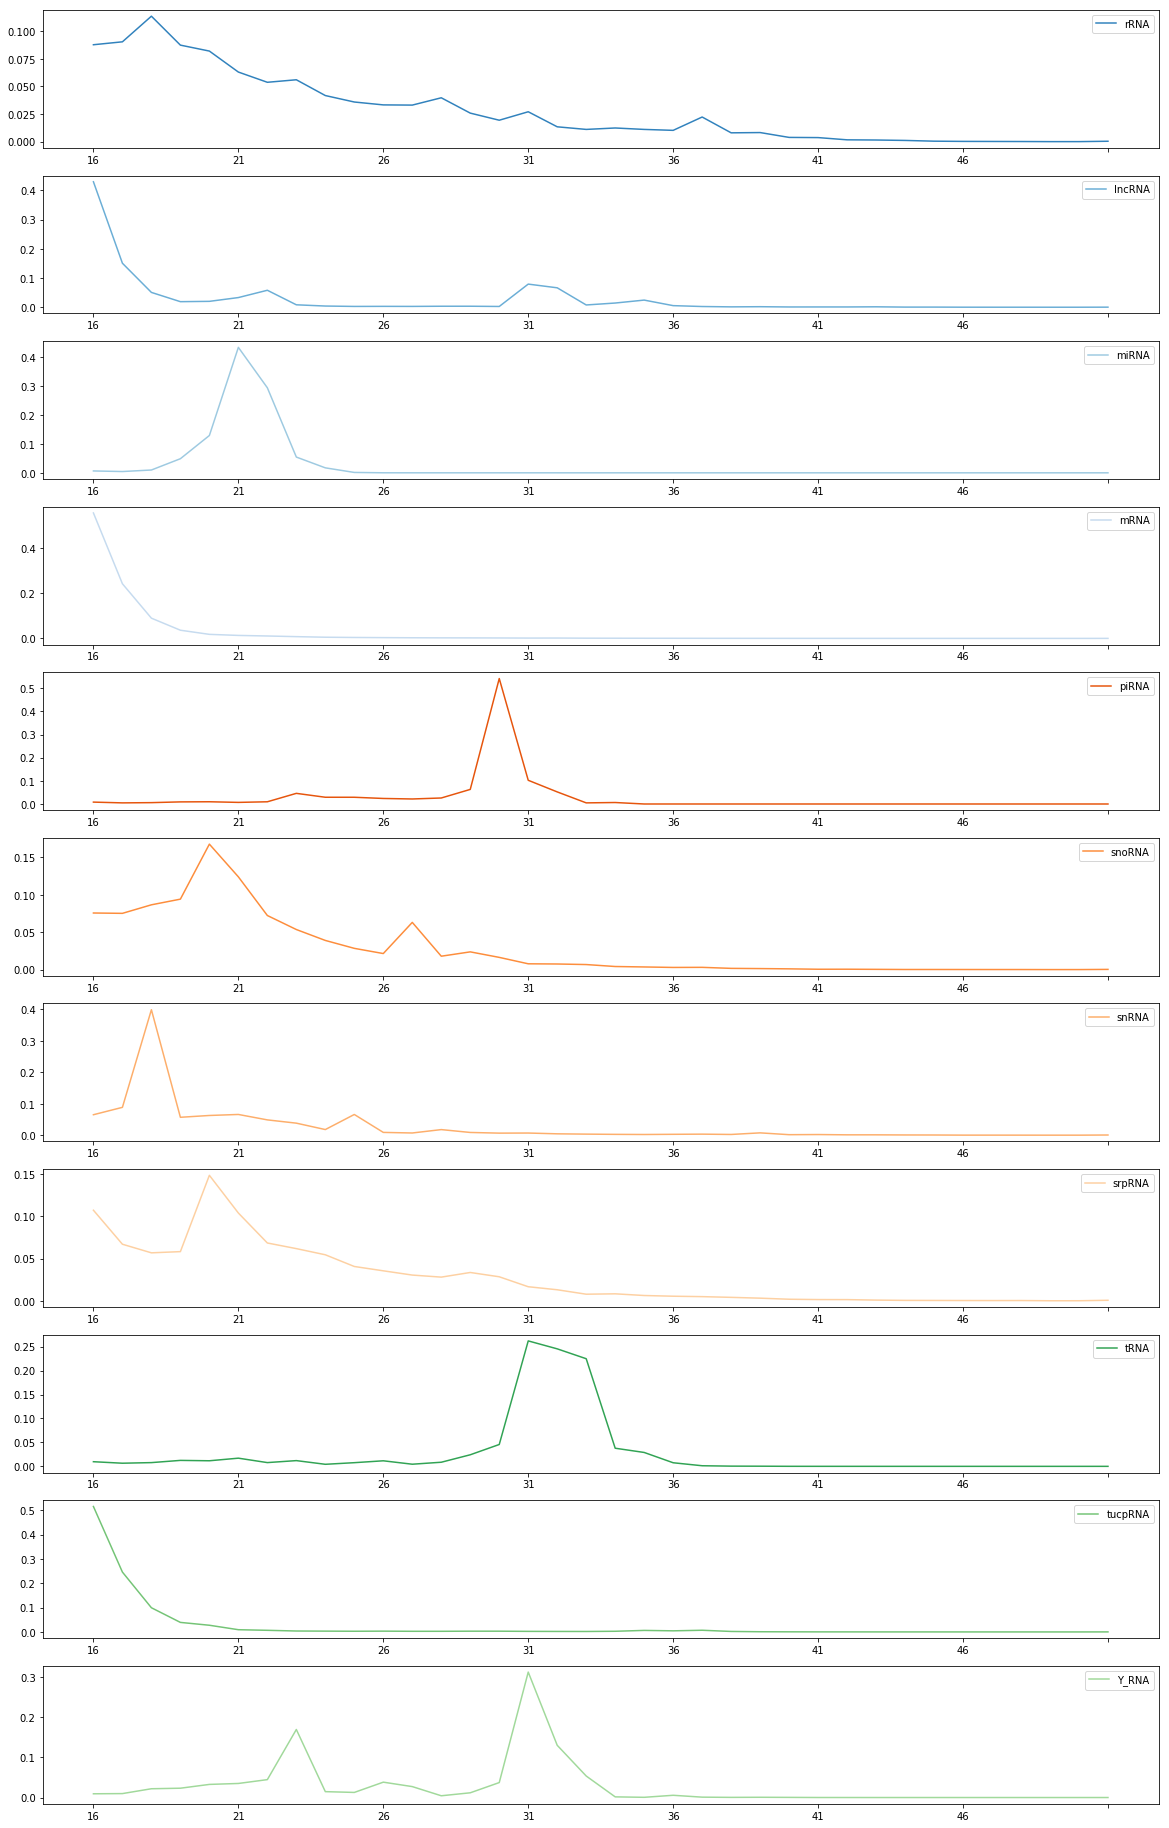

In [12]:
def plot_length_line(data, rnanames, width=20, height=50, savefig=False):
    '''
    data: length_table
    rnanames: rna type names
    '''
    length = np.array(data.T)
    fig,ax=plt.subplots(length.shape[0],1,figsize=(width, height))
    for i in range(length.shape[0]):
        ax[i].plot(length[i],label=data.columns[i], color=Category20c[20][i])
        ax[i].legend(loc='upper right')
        ax[i].set_xticks(np.arange(0, data.shape[0],5))
        ax[i].set_xticklabels(np.arange(data.index[0], data.index[-1],5))
    if savefig:
        fig.savefig(plot_save_path+'rna_length_line_plot.png', bbox_inches='tight')
if sequencing_type == 'long': 
    plot_length_line(length_table_1, rnanames_1, width=20, height=length_table_1.shape[1]*3, savefig=False)
    plot_length_line(length_table_2, rnanames_2, width=20, height=length_table_2.shape[1]*3, savefig=False)
else: 
    plot_length_line(length_table, rnanames, width=20, height=length_table.shape[1]*3, savefig=False)

In [13]:
max(np.array(length_table.T)[1])

0.42943757153705664

In [14]:
def plot_length_line(data, rnanames, width=7, height=20, savefig=False):
    '''
    data: length_table
    rnanames: rna type names
    '''
    length = np.array(data.T)
    fig,ax=plt.subplots(length.shape[0],1,figsize=(width, height))
    for i in range(length.shape[0]):
        ax[i].plot(length[i],label=data.columns[i], color=Category20c[20][i],linewidth=1)
        ax[i].legend(loc='upper right')
        ax[i].set_xticks(np.arange(0, data.shape[0],5))
        ax[i].set_xticklabels(np.arange(data.index[0], data.index[-1]+5,5))
        std_plot(ax[i],'','',ylim=[0,max(length[i])],ybins=5)
        legend = ax[i].legend(prop=fontlegend,
              bbox_to_anchor=None,
              borderpad=1,
              edgecolor="#000000",fancybox=False)
        ax[i].legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        #ax[i].set(ylim=[0,1])
        #if i != 10:
        #    ax[i].spines['bottom'].set_visible(False)
        #    ax[i].set_xticks([])
    if savefig:
        fig.savefig(plot_save_path+'rna_length_line_plot.eps', bbox_inches='tight')
    fig.tight_layout()
    embed_pdf_figure()
    
plot_length_line(length_table, rnanames, width=7, height=length_table.shape[1]*2, savefig=False)

## 3D barplot of rna length

In [15]:
{'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}

{'family': 'Arial', 'weight': 'normal', 'size': 6.5}

In [252]:
width=7
height=5
azim = 45
elev = 32
savefig=False
'''
data: length_table
'''
data = length_table
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(width,height))
ax1 = fig.gca(projection="3d")
num = data.shape[1]
count_ = data.shape[0]
xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
ypos = np.repeat(range(num),count_).ravel()
num_elements = len(xpos)
zpos = np.zeros(count_*num)
dx = np.ones(count_*num)/5
dy = np.ones(count_*num)/5
dz = np.array(data.T).ravel()

for i in range(num):
    ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
              dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(Category20c[20]))[:num][i],alpha=0.9)
#pyplot.show()
plt.xticks(range(count_), [str(i+16) for i in range(count_)], size=6.5,color='red',weight='normal',family='Arial',rotation=-80)
ax1.set_yticks(range(num))
#display(data.columns)
ax1.set_yticklabels(data.columns, color='blue',weight='normal',family='Arial', size=6.5)
fig.canvas.draw()
ax1.set_zticks(ax1.get_zticks())
ax1.set_zticklabels(ax1.get_zticklabels(),weight='normal',family='Arial', size=6.5)
display(list(ax1.get_zticks()))
for color,tick in zip((Category20c[20])[:num],ax1.yaxis.get_major_ticks()):
    tick.label1.set_color(color)
ax1.view_init(azim=azim,elev=elev)  
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')
fig.tight_layout()
embed_pdf_figure()

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001]

In [253]:
def plot_3d(width=7, height=5,  azim = 45, elev = 32,savefig=False):
    '''
    data: length_table
    '''
    data = length_table
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(width,height))
    ax1 = fig.gca(projection="3d")
    num = data.shape[1]
    count_ = data.shape[0]
    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = np.array(data.T).ravel()
    
    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(Category20c[20]))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+16) for i in range(count_)], size=6.5,color='red',weight='normal',family='Arial',rotation=-azim)
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(data.columns, color='blue',weight='normal',family='Arial', size=6.5)
    fig.canvas.draw()
    ax1.set_zticks(ax1.get_zticks())
    ax1.set_zticklabels(ax1.get_zticklabels(),weight='normal',family='Arial', size=6.5)
    for color,tick in zip((Category20c[20])[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    fig.tight_layout()
    if savefig:
        fig.savefig(plot_save_path+'rna_length_3D_barplot.png', bbox_inches='tight')

In [254]:
plot_3d(width=7, height=5, savefig=False, azim = 45, elev = 32)
embed_pdf_figure()

In [19]:
interact(plot_3d,
    width =FloatSlider(min=4,max=40,step=1,value=25),
    height= FloatSlider(min=4,max=30,step=1,value=16),
    azim= FloatSlider(min=0,max=180,step=2,value=45),
    elev= FloatSlider(min=0,max=180,step=1,value=32))

interactive(children=(FloatSlider(value=25.0, description='width', max=40.0, min=4.0, step=1.0), FloatSlider(value=16.0, description='height', max=30.0, min=4.0, step=1.0), FloatSlider(value=45.0, description='azim', max=180.0, step=2.0), FloatSlider(value=32.0, description='elev', max=180.0, step=1.0), Checkbox(value=False, description='savefig'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d(width=7, height=5, azim=45, elev=32, savefig=False)>

## stack bar plot of rna counts and ratio

In [20]:
from matplotlib.colors import LinearSegmentedColormap
def stack_bar_ratio(table, statistics = 'ratio',savefig=False):   
    
    table.plot(kind='bar', stacked=True,ax=ax,width=0.5,
                legend=True,colormap=matplotlib.colors.ListedColormap ( Category20c[20]))
    #ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
    #ax.set_title('Stacked Bar plot',fontsize=40)
    if savefig:
        fig.savefig(plot_save_path+statistics+'_stack_barplot.png', bbox_inches='tight')
    return ax

In [22]:
fig,ax=plt.subplots(figsize=(14,6))
if sequencing_type == 'short': 
    ax = stack_bar_ratio(table_ratio)
elif sequencing_type == 'long': 
    ax = stack_bar_ratio(table_ratio_1)
    ax = stack_bar_ratio(table_ratio_2)
std_plot(ax,'sample','percentage',legendtitle='type',legendsort=False,ylim=[0,1],bbox_to_anchor=(1,1),borderpad=0.2)
fig.tight_layout()
embed_pdf_figure()

In [23]:
fig,ax=plt.subplots(figsize=(14,6))
if sequencing_type == 'short': 
    ax = stack_bar_ratio(table_count)
elif sequencing_type == 'long': 
    ax = stack_bar_ratio(table_count_1)
    ax = stack_bar_ratio(table_count_2)
std_plot(ax,'sample','counts(1e7)',legendtitle='type',legendsort=False,bbox_to_anchor=(1,1),borderpad=0.2)
fig.tight_layout()
embed_pdf_figure()

## bar plot of RNA by sample

In [24]:
def plot_bar_by_rna(ax,table,rnaname,savefig=False, statistics = 'ratio',height = 4, width=20):
    '''
    table: ratio or count table, rows are rna type
    statistics: ratio or count
    '''
    table = table.T
    count = np.array(table[table.index ==rnaname]).ravel()
    #fig,ax=plt.subplots(1,figsize=(width,height))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                count[np.argsort(-count)].reshape(-1,1)),axis=1),columns=['sample',statistics])
    sns.barplot(ax=ax,x='sample',y=statistics,data = counttable,color=Category20c[20][np.random.randint(0,20)],alpha=1)
    ax.set_xticks(np.arange(0,table.shape[1],5))
    ax.set_xticklabels(np.arange(0,table.shape[1],5))
    ax.set_title(statistics+' of '+rnaname,fontsize=15)
    if savefig:
        fig.savefig(plot_save_path+'sample_'+rnaname+'_'+statistics+'_bar_plot.png', bbox_inches='tight')

In [25]:
def plot_bar_by_rna_total(table,datatype='ratio'):
    fignum= table.columns.shape[0]
    fig,ax=plt.subplots(fignum ,1,figsize=(7 , 24 ))
    for i in range(fignum):
        plot_bar_by_rna(ax[i],table,table.columns[i],statistics = datatype)
        std_plot(ax[i],'sample','ratio',datatype+' of '+table.columns[i])
    fig.tight_layout() 

In [26]:
table_ratio.columns.shape[0]

17

In [27]:
if sequencing_type == 'short': 
    plot_bar_by_rna_total(table_ratio,datatype='ratio')
elif sequencing_type == 'long': 
    plot_bar_by_rna_total(table_ratio_1,datatype='ratio')
    plot_bar_by_rna_total(table_ratio_2,datatype='ratio')
embed_pdf_figure()

In [28]:
if sequencing_type == 'short': 
    plot_bar_by_rna_total(table_count,datatype='count')
elif sequencing_type == 'long': 
    plot_bar_by_rna_total(table_count_1,datatype='count')
    plot_bar_by_rna_total(table_count_2,datatype='count')
embed_pdf_figure()

## FastQC

In [29]:
summary = pd.read_table('output/'+dataset+'/summary/fastqc.txt', sep='\t')
qc_status = summary.iloc[:, 9:]
qc_status.fillna('NA')
qc_status = qc_status.astype('str')
sample_ids = summary.sample_id
sections = qc_status.columns.values
def style_func(val):
    status, row, col = val.split('|')
    row, col = int(row), int(col)
    color = {'pass': 'green', 'fail': 'red', 'warn': 'orange'}.get(status, 'gray')
    return '<a href="../output/'+dataset+'/fastqc/{sample_id}_fastqc.html#M{section}" style="color: {color}">{status}</a>'.format(
        sample_id=sample_ids[row], color=color, status=status, section=col + 1)

pd.DataFrame(qc_status.values \
             + '|' + np.arange(qc_status.shape[0]).astype('str')[:, np.newaxis] \
             + '|' + np.arange(qc_status.shape[1]).astype('str')[np.newaxis, :],
             index=qc_status.index, columns=qc_status.columns) \
    .style.format(style_func)

## Sample QC
use PCA and tSNE to visualize outliters

In [30]:
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)

In [31]:
def PCA_plot_basic(ax,data,sampleclass,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.columns = ['dimension_1','dimension_2']
    g = sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                   s=50)
    return g
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
def sample_qc_visualize_outlier(original_mx,table_ratio,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7, 4))
    if method=='PCA':
        method_PCA = True
    elif method=='tSNE':
        method_PCA = False
    g = PCA_plot_basic(ax[0],original_mx, method_PCA)
    std_plot(g,'Dimension 1','Dimension 2','Original matrix')
    g = PCA_plot_basic(ax[1],table_ratio, method_PCA)
    std_plot(g,'Dimension 1','Dimension 2','Table ratio')
    embed_pdf_figure()

In [32]:
sample_qc_visualize_outlier(original_mx,table_ratio.T,method='PCA')


In [33]:
sample_qc_visualize_outlier(original_mx,table_ratio.T,method='tSNE')

# Matrix processing

In [34]:
def null_name(string):
    if string =='null':
        return '.null'
    else:
        return '.'+string
    
def generate_processed_filename(original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index): 
    imputename = null_name(imputation_method)
    normname = null_name(normalization_method)
    batchname = null_name(batch_removal_method)
    if batch_index=='null':
        batchindname = ''
    else:
        batchindname = '_'+batch_index
    return'filter'+imputename+normname+batchname+batchindname+'.'+original_mx_file.split('/')[-1]

In [287]:
matrix_processing_path = 'output/'+dataset+'/matrix_processing/'
imputation_method = best_preprocess_methods[example_cancer].split('.')[1]
normalization_method = best_preprocess_methods[example_cancer].split('.')[2]
batch_removal_method = best_preprocess_methods[example_cancer].split('.')[3]
batch_index = 'null'
class_info = 'data/'+dataset+'/sample_classes.txt'
batch_info = 'data/'+dataset+'/batch_info.txt'
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'



original_mx = pd.read_table(original_mx_file,index_col=0)
processed_mx = pd.read_table(matrix_processing_path+generate_processed_filename(\
            original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index),index_col=0)
sample_class = pd.read_table(class_info,sep='\t',index_col=0)
batchtable = pd.read_table(batch_info,sep='\t',index_col=0)


In [ ]:
sequencing_type = 'short'  #short long domain_only transcript

if sequencing_type == 'short':
    exp_mx_name = 'domains_combined'
elif sequencing_type =='long':
    exp_mx_name = 'featurecounts'
elif sequencing_type =='domain_only':
    exp_mx_name = 'domains_long'
elif sequencing_type =='transcript':
    exp_mx_name = 'transcript'

In [36]:
def get_best_preprocess_methods(output_dir, preselected_methods_dir):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
            for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                classifier, n_select, select_method  = feature_selection_method.split('.')
                record = {
                    'compare_group': compare_group,
                    'classifier': classifier,
                    'n_features': n_select,
                    'preprocess_method': preprocess_method
                }
                try:
                    metrics = pd.read_table(os.path.join(output_dir,
                        preprocess_method, compare_group, feature_selection_method,
                        'metrics.txt'))
                except:
                    continue
                record['test_roc_auc_mean'] = metrics['test_roc_auc'].mean()
                pbar.update(1)
                records.append(record)
    pbar.close()
    records = pd.DataFrame.from_records(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
    return best_preprocess_methods

#use uca to presort methods
preselected_methods = np.loadtxt('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/selected_methods.txt',dtype='str')
preselected_methods_dir = np.array([preselected_methods[i]+'.'+exp_mx_name for i in range(preselected_methods.shape[0])])

best_preprocess_methods = get_best_preprocess_methods('output/'+dataset+'/feature_selection',preselected_methods_dir)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

FileNotFoundError: [Errno 2] No such file or directory: 'output/scirep/feature_selection/filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined'

In [54]:
best_preprocess_methods = \
{'Normal-CRC': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S1': 'filter.null.Norm_CPM.Batch_RUV.domains_combined',
 'Normal-CRC_S2': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S3': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S4': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-PAAD': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-PRAD': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined'}

In [55]:
best_preprocess_methods[example_cancer].split('.')

['filter', 'scimpute_count', 'Norm_SCnorm', 'Batch_RUV', 'domains_combined']

## abundance and diversity

In [387]:
def div_abu_plot(expression_mx,savefig=True):
    #### Diversity matrix
    type_counts_sample = pd.DataFrame()
    for samplename in expression_mx.columns.values:
        #names_[samplename] = expression_mx[samplename].index

        filter_zero_samplename = expression_mx.iloc[np.where(expression_mx[samplename]>0)[0],:]
        names = filter_zero_samplename.index
        names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
        type_counts = np.unique(names_type, return_counts = True)
        new = pd.DataFrame({'type' : type_counts[0],
                            samplename : type_counts[1],
                           })
        new = new.set_index('type')
        type_counts_sample = pd.concat([type_counts_sample, new], axis=1)#, join_axes=[df1.index]
    #expression_mx = original_mx
    typelist = np.unique([expression_mx.index[i].split('|')[1] for i in range(expression_mx.shape[0])])
    type_mx = pd.DataFrame(index=typelist,columns=expression_mx.columns)
    for sample in expression_mx.columns:
        sample_feature = pd.DataFrame(data=expression_mx.loc[:,sample],index=expression_mx.index)
        sample_feature['type']=[expression_mx.index[i].split('|')[1] for i in range(expression_mx.shape[0])]
        for i in typelist:
            #print(i,sample,sample_feature.iloc[np.where(sample_feature['type']==i)].iloc[:,0].sum())
            type_mx.loc[i,sample] = sample_feature.iloc[np.where(sample_feature['type']==i)].iloc[:,0].sum()
    table_ratio = (type_mx/type_mx.sum()).T
    ####mean_sd matrix
    xticks = type_counts_sample.index.tolist()
    Means = type_counts_sample.mean(axis=1).values.tolist()
    Std=type_counts_sample.std(axis=1).values.tolist()
    mean_sd = pd.DataFrame(data = {'type':xticks,'mean':Means,'std':Std})
    mean_sd = mean_sd.sort_values(by='mean',ascending=False)
    mean_sd = mean_sd.set_index('type')
    Std = [[0]*len(mean_sd['std'].tolist()),mean_sd['std'].tolist()]
    ab = table_ratio*100
    #ab['genomic'] = ab['intron'] + ab['promoter'] + ab['enhancer'] + ab['repeats'] + ab['circRNA'] +ab['other']
    xticks_ab = ab.columns.tolist()
    Means_ab = ab.mean(axis=0).values.tolist()
    Std_ab = ab.std(axis=0).values.tolist()
    mean_sd_ab = pd.DataFrame(data = {'type':xticks_ab,'mean_ab':Means_ab,'std_ab':Std_ab})
    mean_sd_ab = mean_sd_ab.set_index('type')
    N = type_counts_sample.shape[0]
    ind = np.arange(N)
    merge = pd.concat([mean_sd,mean_sd_ab],axis=1,join_axes=[mean_sd.index])
    Std_ab = [[0]*len(merge['std_ab'].tolist()),merge['std_ab'].tolist()]
    xticks = merge.index.tolist()
    ####plot
    plt.rcParams['figure.dpi'] = 300    
    fig,(ax,ax1) = plt.subplots(1,2,figsize = (7,3.5))
    ax.barh(ind,merge['mean'],0.7,xerr=Std,color='grey')
    ax.invert_xaxis()
    ax.set_yticks(ind)
    ax.set_yticks([])
    ax = std_plot(ax,'Number of detected genes','','Diversity',left=False)#,ylim=[np.min(ind),np.max(ind)]
    ax1.barh(ind,merge['mean_ab'],0.7,xerr=Std_ab,color="grey",)
    ax1.set_yticks(ind)
    ax1.set_yticklabels(xticks)
    ax1 = std_plot(ax1,'Percentage of mapped reads (%)','','Abundance')
    if savefig is True:
        fig.savefig('diversity_abundance.eps')
    embed_pdf_figure()    

div_abu_plot(expression_mx=original_mx,savefig=True)

## filtering effect

In [49]:
def plot_bar_for_filter(expression_mx,cutoff_ratio = 0.2,counts_threshold = 10 ):
    retain_index = np.where(np.sum(expression_mx > counts_threshold,axis=1) >=round(cutoff_ratio*expression_mx.shape[1]))[0]
    filter_mx = expression_mx.iloc[retain_index,:]
    names = expression_mx.index
    names_ = filter_mx.index
    names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
    type_counts = np.unique(names_type, return_counts = True)
    names_type_ = np.array([names_[i].split('|')[1] for i in range(names_.shape[0])])
    type_counts_ = np.unique(names_type_, return_counts = True)
    typedataframe = pd.DataFrame(np.concatenate((type_counts[0].reshape(-1,1),type_counts[1].reshape(-1,1)),axis=1))
    typedataframe.columns = ['type','counts']
    typedataframe_ = pd.DataFrame(np.concatenate((type_counts_[0].reshape(-1,1),type_counts_[1].reshape(-1,1)),axis=1))
    typedataframe_.columns = ['type','counts']
    typedataframe.counts = pd.to_numeric(typedataframe.counts)
    typedataframe_.counts = pd.to_numeric(typedataframe_.counts)
    dataall = pd.concat((typedataframe,typedataframe_))
    operation = np.concatenate((np.repeat('original',typedataframe.shape[0]),
                                           np.repeat('filter',typedataframe.shape[0])))

    dataall['operation'] = operation
    fig,ax=plt.subplots(1,figsize=(7, 3))
    sns.barplot(ax=ax,data=dataall,x='type',y='counts',hue='operation')
    #ax.set_title('samples with expression value higher than '+str(counts_threshold) +
    #                ' are more than '+str(round(cutoff_ratio*100))+'%',fontsize=26)
    std_plot(ax,'type','counts',
             'samples with expression value higher than '+str(counts_threshold) +
             ' are more than '+str(round(cutoff_ratio*100))+'%',legendtitle='operation',legendsort=False,borderpad=1,handletextpad=1)
    print (expression_mx.shape[0],' original feature')
    print (retain_index.shape[0],' feature remained')
plot_bar_for_filter(original_mx,cutoff_ratio = 0.1 ,counts_threshold = 10 )
embed_pdf_figure()

19241  original feature
6050  feature remained


In [50]:
def plot_bar_for_filter_cpm(expression_mx,cutoff_ratio = 0.2,counts_threshold = 10):
    exshape = expression_mx.shape[0]
    cpm_mat = expression_mx/expression_mx.sum(axis=0)*10e6
    length_tmp = np.array([cpm_mat.index[i].split('|')[-1] for i in range(cpm_mat.index.shape[0])]).astype('int')-\
    np.array([cpm_mat.index[i].split('|')[-2] for i in range(cpm_mat.index.shape[0])]).astype('int')
    rpkm_mat = (cpm_mat.T/length_tmp*1000).T
    if sequencing_type=='short': #cpm
        expression_mx = cpm_mat
        matname = 'CPM'
    if sequencing_type=='long': #rpm
        expression_mx = rpkm_mat 
        matname = 'RPKM'
    retain_index = np.where(np.sum(expression_mx > counts_threshold,axis=1) >=round(cutoff_ratio*expression_mx.shape[1]))[0]
    filter_mx = expression_mx.iloc[retain_index,:]
    names = expression_mx.index
    names_ = filter_mx.index
    names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
    type_counts = np.unique(names_type, return_counts = True)
    names_type_ = np.array([names_[i].split('|')[1] for i in range(names_.shape[0])])
    type_counts_ = np.unique(names_type_, return_counts = True)
    typedataframe = pd.DataFrame(np.concatenate((type_counts[0].reshape(-1,1),type_counts[1].reshape(-1,1)),axis=1))
    typedataframe.columns = ['type','counts']
    typedataframe_ = pd.DataFrame(np.concatenate((type_counts_[0].reshape(-1,1),type_counts_[1].reshape(-1,1)),axis=1))
    typedataframe_.columns = ['type','counts']
    typedataframe.counts = pd.to_numeric(typedataframe.counts)
    typedataframe_.counts = pd.to_numeric(typedataframe_.counts)
    dataall = pd.concat((typedataframe,typedataframe_))
    operation = np.concatenate((np.repeat('original',typedataframe.shape[0]),
                                           np.repeat('filter',typedataframe.shape[0])))
    dataall['operation'] = operation
    fig,ax=plt.subplots(1,figsize=(7 , 2))
    sns.barplot(ax=ax,data=dataall,x='type',y='counts',hue='operation')
    #ax.set_title('Samples with '+matname+' expression value higher than '+str(counts_threshold) +
    #                ' are more than '+str(round(cutoff_ratio*100))+'%',fontsize=26)
    std_plot(ax,'type','counts',
             'Samples with '+matname+' expression value higher than '+str(counts_threshold) +
             ' are more than '+str(round(cutoff_ratio*100))+'%',
             legendtitle='operation',legendsort=False,borderpad=1,handletextpad=1)
    print (exshape,' original feature')
    print (retain_index.shape[0],' feature remained')
plot_bar_for_filter_cpm(original_mx,cutoff_ratio = 0.1 ,counts_threshold = 10 )
fig.tight_layout()
embed_pdf_figure()


19241  original feature
6129  feature remained


## relative log expression

TO DO

## expression vs read depth

TO DO

## define clustering score

In [206]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    print (same_class_fractions.shape,np.mean(same_class_fractions),K/N,neighbor_classes)
    return score
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes
def unsupervised_clustering_accuracy(y, y_pred):
    """
    Unsupervised Clustering Accuracy
    """
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind
def clustering_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    asw_score = silhouette_score(X, labels)
    nmi_score = NMI(labels, labels_pred)
    ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return asw_score, nmi_score, ari_score, uca_score

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_clustering_score(data,sampleclass,method = 'PCA',prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    #X_pca = transform.fit_transform(X)
    X_, y_ = X, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    #asw_score, nmi_score, ari_score, uca_score = clustering_scores(X_, y_, prediction_algorithm)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

## plot UCA score of different methods

In [207]:
uca_summary = pd.read_table('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/summary.txt',
                           index_col=0)
                            

In [222]:
uca_summary

uca_score
preprocess_method                                           
filter.viper_count.Norm_TMM.Batch_RUV               0.380208
filter.viper_count.Norm_SCnorm.Batch_RUV            0.380208
filter.viper_count.Norm_CPM_top.Batch_RUV           0.348958
filter.viper_count.Norm_CPM.Batch_RUV               0.338542
filter.null.Norm_CPM.Batch_Combat_1                 0.317708
filter.null.Norm_SCnorm.Batch_Combat_2              0.312500
filter.scimpute_count.Norm_CPM.Batch_Combat_1       0.307292
filter.null.Norm_SCnorm.Batch_RUV                   0.302083
filter.viper_count.Norm_RLE.Batch_RUV               0.302083
filter.viper_count.Norm_RLE.Batch_Combat_2          0.302083
filter.null.Norm_TMM.Batch_Combat_2                 0.302083
filter.viper_count.Norm_CPM.Batch_Combat_1          0.296875
filter.null.Norm_TMM.Batch_RUV                      0.296875
filter.scimpute_count.Norm_CPM.Batch_RUV            0.291667
filter.null.Norm_SCnorm.Batch_null                  0.291667
filter.null.Norm_SCnorm.Batch_Combat_3              0.291667
filter.viper_count.Norm_RLE.Batch_Combat_1          0.286458
filter.viper_count.Norm_TMM.Batch_Combat_2          0.286458
filter.scimpute_count.Norm_TMM.Batch_Combat_1       0.286458
filter.scimpute_count.Norm_SCnorm.Batch_RUV         0.286458
filter.null.Norm_TMM.Batch_Combat_1                 0.286458
filter.scimpute_count.Norm_TMM.Batch_Combat_2       0.281250
filter.scimpute_count.Norm_SCnorm.Batch_Combat_2    0.281250
filter.viper_count.Norm_SCnorm.Batch_null           0.281250
filter.viper_count.Norm_TMM.Batch_Combat_1          0.276042
filter.scimpute_count.Norm_TMM.Batch_RUV            0.276042
filter.null.Norm_RLE.Batch_Combat_1                 0.276042
filter.viper_count.Norm_SCnorm.Batch_Combat_2       0.276042
filter.viper_count.Norm_SCnorm.Batch_Combat_3       0.276042
filter.null.Norm_CPM_top.Batch_RUV                  0.270833
...                                                      ...
filter.viper_count.Norm_CPM.Batch_Combat_2          0.255208
filter.scimpute_count.Norm_RLE.Batch_Combat_3       0.255208
filter.scimpute_count.Norm_SCnorm.Batch_Combat_1    0.255208
filter.scimpute_count.Norm_RLE.Batch_null           0.255208
filter.scimpute_count.Norm_CPM.Batch_Combat_3       0.250000
filter.null.Norm_CPM.Batch_Combat_2                 0.250000
filter.scimpute_count.Norm_SCnorm.Batch_null        0.250000
filter.scimpute_count.Norm_TMM.Batch_Combat_3       0.250000
filter.null.Norm_RLE.Batch_Combat_3                 0.250000
filter.viper_count.Norm_CPM.Batch_Combat_3          0.250000
filter.viper_count.Norm_RLE.Batch_null              0.250000
filter.null.Norm_CPM.Batch_null                     0.250000
filter.viper_count.Norm_CPM_top.Batch_Combat_3      0.250000
filter.viper_count.Norm_SCnorm.Batch_Combat_1       0.250000
filter.null.Norm_CPM_top.Batch_Combat_3             0.244792
filter.null.Norm_CPM.Batch_RUV                      0.244792
filter.null.Norm_CPM_top.Batch_Combat_2             0.244792
filter.null.Norm_CPM.Batch_Combat_3                 0.244792
filter.null.Norm_CPM_top.Batch_null                 0.244792
filter.scimpute_count.Norm_CPM_top.Batch_Combat_3   0.244792
filter.scimpute_count.Norm_CPM_top.Batch_RUV        0.244792
filter.scimpute_count.Norm_CPM.Batch_Combat_2       0.244792
filter.scimpute_count.Norm_CPM_top.Batch_Combat_2   0.244792
filter.viper_count.Norm_CPM_top.Batch_null          0.244792
filter.scimpute_count.Norm_CPM_top.Batch_null       0.244792
filter.scimpute_count.Norm_CPM.Batch_null           0.244792
filter.viper_count.Norm_CPM_top.Batch_Combat_2      0.244792
filter.viper_count.Norm_TMM.Batch_Combat_3          0.239583
filter.viper_count.Norm_CPM.Batch_null              0.239583
filter.scimpute_count.Norm_SCnorm.Batch_Combat_3    0.239583

[75 rows x 1 columns]

In [208]:
uca_summary_table = pd.DataFrame(np.ndarray([uca_summary.shape[0],4]))
uca_summary_table.columns = ['imputation','normalization','batch_removal','uca_score']
for i in range(uca_summary.shape[0]):
    splittmp = uca_summary.index[i].split('.')
    uca_summary_table.iloc[i,0] = splittmp[1]
    uca_summary_table.iloc[i,1] = splittmp[2]
    uca_summary_table.iloc[i,2] = splittmp[3]
    uca_summary_table.iloc[i,3] = uca_summary.values[i]

In [209]:
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[0]).mean(),filename='Imputation Methods UCA Score',gradientfunc=False)
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[1]).mean(),filename='Normalization Methods UCA Score',gradientfunc=False)
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[2]).mean(),filename='Batch Removal Methods UCA Score',gradientfunc=False)
uca_mean_summary = pd.concat((uca_summary_table.groupby(uca_summary_table.columns[0]).mean(),
          uca_summary_table.groupby(uca_summary_table.columns[1]).mean(),
          uca_summary_table.groupby(uca_summary_table.columns[2]).mean()))
uca_mean_summary =  uca_mean_summary.rename(index={'null': 'imputation_null'})

In [211]:
fig, ax = plt.subplots(1,figsize=(7, 4))
uca_mean_summary.plot(kind='bar',ax=ax,width=0.8,
                legend=True)
std_plot(ax,'','')
legend = ax.legend(prop=fontlegend,
              bbox_to_anchor=[0.2,1],
              borderpad=1,
              edgecolor="#000000",fancybox=False)
ax.legend_.get_frame()._linewidth=0.5
legend.get_title().set_fontweight('normal')
legend.get_title().set_fontsize(6.5)
fig.tight_layout()

embed_pdf_figure()
#fig.tight_layout()
#plt.figure(linewidth=30.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

## PCA, tSNE and UMAP plot

In [212]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                    palette=np.array(Category20c[20]).reshape(4,-1).T.ravel()[:classnum],hue="class",s=30)
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    uca_score = get_clustering_score(data, sampleclass)
    #ax.set_title('UCA score: {:.6f}'.format(uca_score))
    #ax.annotate('UCA score: {:.6f}'.format(uca_score),xy=(1,0),xycoords='data',size=6.5)
    #print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[data.columns.values].values.ravel() )))
    return uca_score

In [213]:
def visualize_effect(original_mx,processed_mx,sample_class,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))
    ucascore = PCA_plot_with_uca_score_sns(ax[0],original_mx,sample_class,method)
    std_plot(ax[0],title='Original matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucascore = PCA_plot_with_uca_score_sns(ax[1],processed_mx,sample_class,method)
    std_plot(ax[1],title='Processed matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)

In [367]:
original_mx

Sample_1S3  Sample_1S6  \
feature                                                                      
hsa-let-7a-2-3p|miRNA|hsa-let-7a-2-3p|hsa-let-7...           9          14   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...         283         503   
hsa-let-7a-5p|miRNA|hsa-let-7a-5p|hsa-let-7a-5p...        2460        6617   
hsa-let-7b-3p|miRNA|hsa-let-7b-3p|hsa-let-7b-3p...         230         340   
hsa-let-7b-5p|miRNA|hsa-let-7b-5p|hsa-let-7b-5p...       56569       55954   
hsa-let-7c-3p|miRNA|hsa-let-7c-3p|hsa-let-7c-3p...          29          53   
hsa-let-7c-5p|miRNA|hsa-let-7c-5p|hsa-let-7c-5p...        3312        5772   
hsa-let-7d-3p|miRNA|hsa-let-7d-3p|hsa-let-7d-3p...        2222        3826   
hsa-let-7d-5p|miRNA|hsa-let-7d-5p|hsa-let-7d-5p...         946        1625   
hsa-let-7e-3p|miRNA|hsa-let-7e-3p|hsa-let-7e-3p...          75         169   
hsa-let-7e-5p|miRNA|hsa-let-7e-5p|hsa-let-7e-5p...         638        1157   
hsa-let-7f-1-3p|miRNA|hsa-let-7f-1-3p|hsa-let-7...          33          80   
hsa-let-7f-2-3p|miRNA|hsa-let-7f-2-3p|hsa-let-7...          64          86   
hsa-let-7f-5p|miRNA|hsa-let-7f-5p|hsa-let-7f-5p...         969        3340   
hsa-let-7g-3p|miRNA|hsa-let-7g-3p|hsa-let-7g-3p...          40          21   
hsa-let-7g-5p|miRNA|hsa-let-7g-5p|hsa-let-7g-5p...        5468        9254   
hsa-let-7i-3p|miRNA|hsa-let-7i-3p|hsa-let-7i-3p...         530         400   
hsa-let-7i-5p|miRNA|hsa-let-7i-5p|hsa-let-7i-5p...       79926       71818   
hsa-miR-1-3p|miRNA|hsa-miR-1-3p|hsa-miR-1-3p|hs...          47          85   
hsa-miR-1-5p|miRNA|hsa-miR-1-5p|hsa-miR-1-5p|hs...           0           0   
hsa-miR-100-3p|miRNA|hsa-miR-100-3p|hsa-miR-100...           0           0   
hsa-miR-100-5p|miRNA|hsa-miR-100-5p|hsa-miR-100...      125313      106045   
hsa-miR-101-2-5p|miRNA|hsa-miR-101-2-5p|hsa-miR...           0           1   
hsa-miR-101-3p|miRNA|hsa-miR-101-3p|hsa-miR-101...       52778       36204   
hsa-miR-101-5p|miRNA|hsa-miR-101-5p|hsa-miR-101...           2           8   
hsa-miR-10226|miRNA|hsa-miR-10226|hsa-miR-10226...           0           2   
hsa-miR-10392-3p|miRNA|hsa-miR-10392-3p|hsa-miR...           0           0   
hsa-miR-10392-5p|miRNA|hsa-miR-10392-5p|hsa-miR...           0           0   
hsa-miR-10393-3p|miRNA|hsa-miR-10393-3p|hsa-miR...           0           0   
hsa-miR-10393-5p|miRNA|hsa-miR-10393-5p|hsa-miR...           0           0   
...                                                        ...         ...   
chrX_153788080_153788100_+|genomic|chrX_1537880...          14           9   
chrX_154367220_154367260_-|genomic|chrX_1543672...           5           8   
chrY_1300600_1300640_+|genomic|chrY_1300600_130...          76          53   
chrY_3367760_3367820_+|genomic|chrY_3367760_336...        6889        8272   
chrY_3893460_3893500_+|genomic|chrY_3893460_389...          11          18   
chrY_4027320_4027360_-|genomic|chrY_4027320_402...          15          13   
chrY_5028460_5028500_+|genomic|chrY_5028460_502...          42          23   
chrY_5445980_5446020_+|genomic|chrY_5445980_544...          28          36   
chrY_7179500_7179540_-|genomic|chrY_7179500_717...          21          10   
chrY_7325360_7325400_-|genomic|chrY_7325360_732...          47          41   
chrY_7740700_7740740_+|genomic|chrY_7740700_774...          19          20   
chrY_8403260_8403300_-|genomic|chrY_8403260_840...          11          12   
chrY_10077160_10077200_-|genomic|chrY_10077160_...          60          67   
chrY_10198540_10198620_+|genomic|chrY_10198540_...          43         243   
chrY_11523020_11523060_+|genomic|chrY_11523020_...          25          11   
chrY_12421760_12421780_-|genomic|chrY_12421760_...          45          11   
chrY_13285740_13285780_+|genomic|chrY_13285740_...           8           7   
chrY_13552420_13552460_-|genomic|chrY_13552420_...           7          15   
chrY_13643040_13643080_-|genomic|chrY_13643040_...          75          34

In [214]:
visualize_effect(original_mx,processed_mx,sample_class,method='UMAP')
embed_pdf_figure()

In [215]:
imputation_method = best_preprocess_methods[example_cancer].split('.')[1]
normalization_method = best_preprocess_methods[example_cancer].split('.')[2]
batch_removal_method = best_preprocess_methods[example_cancer].split('.')[3]

In [216]:
impute_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method +'.'+exp_mx_name+'.txt')
normalize_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method +'.'+normalization_method+'.'+exp_mx_name+'.txt',index_col=0)
batch_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method+'.'+normalization_method+'.'+batch_removal_method+'.'+exp_mx_name+'.txt',index_col=0)


In [217]:
def visualize_effect_all(original_mx,impute_mx, normalize_mx, batch_mx, sample_class,method='PCA'):
    fig, ax = plt.subplots(2,2,figsize=(7,7))
    ucalist = pd.DataFrame(index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
    ucalist[0]=None
    #uca_rna_mx[rnatype]['Original matrix']
    ucalist[0][0] = PCA_plot_with_uca_score_sns(ax[0,0],original_mx,sample_class,method)
    std_plot(ax[0,0],title='Original matrix '+'UCA score: {:.6f}'.format(ucalist[0][0]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][1] = PCA_plot_with_uca_score_sns(ax[0,1],impute_mx,sample_class,method)
    std_plot(ax[0,1],title='Imputed matrix '+'UCA score: {:.6f}'.format(ucalist[0][1]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][2] = PCA_plot_with_uca_score_sns(ax[1,0],normalize_mx,sample_class,method)
    std_plot(ax[1,0],title='Normalized matrix '+'UCA score: {:.6f}'.format(ucalist[0][2]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][3] = PCA_plot_with_uca_score_sns(ax[1,1],batch_mx,sample_class,method)
    std_plot(ax[1,1],title='Batch-removed matrix '+'UCA score: {:.6f}'.format(ucalist[0][3]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    return fig,ucalist

In [218]:
def visualize_effect_final(original_mx,final_mx, sample_class,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))
    ucascore = PCA_plot_with_uca_score_sns(ax[0],original_mx,sample_class,method)
    std_plot(ax[0],title='Original matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucascore = PCA_plot_with_uca_score_sns(ax[1],final_mx,sample_class,method)
    std_plot(ax[1],title='Processed matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)

In [219]:
visualize_effect_final(original_mx,processed_mx, sample_class,method='UMAP')
embed_pdf_figure()

In [220]:
visualize_effect_all(original_mx, impute_table, normalize_table, batch_table, sample_class,method='UMAP')
embed_pdf_figure(title='UCA score of matrices through four procedures')

## kBET

In [355]:
mat_list = [i+'.'+exp_mx_name+'.txt' for i in uca_summary.index]

In [238]:
from rpy2.robjects import r
%load_ext rpy2.ipython

In [296]:
batch_index=1

In [380]:
%%R -i mat_list,batch_info,dataset,exp_mx_name,batch_index -o kBET_score_list
library('kBET')
setwd('/home/xieyufeng/ex')

batch <-read.table(batch_info,sep='\t',row.names=1,header=T,check.names = FALSE)
index <- c()
kBET_score_list <- c()
for(i in seq_len(length(mat_list))){
    mat = read.table(paste0('output/',dataset,'/matrix_processing/',mat_list[i]),sep='\t',row.names=1,header=TRUE,check.names = FALSE)
    batchname <-toString(names(batch)[batch_index])

    batch=batchtable[names(mat),]
    batch_info <- factor(batch[,batch_index])
    batch.estimate <- kBET(mat, batch_info,plot=F)
    kBET_score = 1-mean(batch.estimate$stats$kBET.observed) #expected
    index <- append(index,mat_list[i])
    kBET_score_list <- append(kBET_score_list,kBET_score)
}
#kBET_summary <- cbind(mat_list,kBET_score_list)


In [395]:
kBET_score_list

R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f18e4a73248 / R:0x5614ff0e1e00>
[0.819200, 0.692000, 0.754800, 0.714000, ..., 0.688800, 0.538400, 0.446800, 0.527200]

In [382]:
kBET_summary.to_csv('kBET_summary.csv')

In [381]:
kBET_summary = pd.DataFrame(data={'preprocess_method':uca_summary.index,'kBET_score':list(kBET_score_list)})
kBET_summary = kBET_summary.set_index('preprocess_method')

In [384]:
kBET_summary_table = pd.DataFrame(np.ndarray([kBET_summary.shape[0],4]))
kBET_summary_table.columns = ['imputation','normalization','batch_removal','kBET_score']
for i in range(kBET_summary.shape[0]):
    splittmp = kBET_summary.index[i].split('.')
    kBET_summary_table.iloc[i,0] = splittmp[1]
    kBET_summary_table.iloc[i,1] = splittmp[2]
    kBET_summary_table.iloc[i,2] = splittmp[3]
    kBET_summary_table.iloc[i,3] = kBET_summary.values[i]
display_dataframe(kBET_summary_table.groupby(kBET_summary_table.columns[0]).mean(),filename='Imputation Methods kBET Score',gradientfunc=False)
display_dataframe(kBET_summary_table.groupby(kBET_summary_table.columns[1]).mean(),filename='Normalization Methods kBET Score',gradientfunc=False)
display_dataframe(kBET_summary_table.groupby(kBET_summary_table.columns[2]).mean(),filename='Batch Removal Methods kBET Score',gradientfunc=False)
kBET_mean_summary = pd.concat((kBET_summary_table.groupby(kBET_summary_table.columns[0]).mean(),
          kBET_summary_table.groupby(kBET_summary_table.columns[1]).mean(),
          kBET_summary_table.groupby(kBET_summary_table.columns[2]).mean()))
kBET_mean_summary =  kBET_mean_summary.rename(index={'null': 'imputation_null'})

In [385]:
fig, ax = plt.subplots(1,figsize=(7, 4))
kBET_mean_summary.plot(kind='bar',ax=ax,width=0.8,
                legend=True)
std_plot(ax,'','')
legend = ax.legend(prop=fontlegend,
              bbox_to_anchor=[0.2,1],
              borderpad=1,
              edgecolor="#000000",fancybox=False)
ax.legend_.get_frame()._linewidth=0.5
legend.get_title().set_fontweight('normal')
legend.get_title().set_fontsize(6.5)
fig.tight_layout()

embed_pdf_figure()
#fig.tight_layout()
#plt.figure(linewidth=30.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

## top K feature


In [221]:
def plot_top20(expression_mx):
    em = expression_mx
    em_ratio = em/em.sum(axis=0)
    em_sum = em.sum(axis=1)
    featurename = pd.DataFrame(em_sum.sort_values(ascending=False)).iloc[:20].index.values.tolist()
    em_top = em_ratio.iloc[np.where(em.index.isin(featurename))[0],:]
    em_top = em_top.reset_index()
    em_top['feature'] = em_top['feature'].astype('category')
    em_top['feature'].cat.reorder_categories(featurename,inplace=True)
    em_top.sort_values('feature',inplace=True)
    em_top = em_top.set_index(['feature'])
    em_top.columns.name = 'samplename'
    stack = pd.DataFrame(em_top.stack())
    stack = stack.reset_index()

    #stack['class'] = stack['samplename']
    #for samplename in unique(stack['samplename']):
    #    stack['class'].iloc[np.where(stack['samplename'] == samplename)] \
    #    = sample_class[sample_class.index==samplename]['label'].values[0]

    stack.rename(columns={ stack.columns[2]: "counts" }, inplace=True)
    stack['feature_cut'] = np.array([stack['feature'][i].split('|')[0] for i in range(stack.shape[0])])
    # attention sns merge function

    fig,ax=plt.subplots(figsize=(7,5))
    ax = sns.stripplot(x="counts", y="feature_cut", data=stack,jitter=True, linewidth=0.1,size=1,color='grey')#,hue="class"
    ax = sns.boxplot(x="counts", y="feature_cut", data=stack,width=0.1,color='#FFFFFF',linewidth=1,fliersize=0,saturation=1)
    std_plot(ax,'Percentage of mapped reads','Feature','Top 20 highly-expressed RNAs',sns=False,legendsort=False,xlim=[0,0.2],borderpad=1)#,legendtitle='class'
    fig.tight_layout()
    embed_pdf_figure()

plot_top20(original_mx)

## show batch

In [64]:
def show_batch_total_counts(ax,batchtable,matrix, batchindex = 1):
    counts = matrix.sum()
    sumtable = pd.DataFrame(np.log(counts),columns=['log total counts'])
    sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)
    #fig,ax=plt.subplots(figsize=(8,6))
    batchname = batchtable.columns[batchindex]
    sns.boxplot(data=sumtable_whole,x=batchname,y='log total counts',ax=ax,linewidth=1,fliersize=0.1)
    #ax.set_title('Batch effect: '+batchname)
    std_plot(ax,batchname,'log total counts')
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #plt.tight_layout()

In [65]:
fig, ax = plt.subplots(1,3,figsize=(7, 2.5))
for  i in range(3):
    show_batch_total_counts(ax[i],batchtable, original_mx, batchindex = i)
plt.tight_layout()
embed_pdf_figure()

In [136]:
def featureplot_total_batch(ax,stack_batch,batchtable,batchindex=1):
    sns.boxplot(ax=ax,data=stack_batch,x=batchtable.columns[batchindex],y='counts',color='grey',linewidth=1,fliersize=0.1)
    std_plot(ax,batchtable.columns[batchindex],'feature counts')#,title='batch effect: '+batchtable.columns[batchindex]+ ' by '+'feature counts'
    
def stack_merge(exp_table,batch,log=False):
    if log is False:
        exp_table = np.log2(exp_table+0.001)
    stack = pd.DataFrame(exp_table.stack())
    stack = stack.reset_index()
    stack['rnaname'] = [featurename.split('|')[1] for featurename in stack.iloc[:,0].tolist()]
    stack.rename(columns={stack.columns[2]: "counts",
                          stack.columns[1]: "sample",
                          stack.columns[0]: "feature"},
                 inplace=True)
    stack = stack.set_index('sample')
    stack_batch = pd.concat([stack,batchtable],axis=1,join_axes=[stack.index])
    stack_batch = stack_batch.reset_index()    
    return(stack_batch)

stack_batch = stack_merge(batch_table,batchtable)
fig, ax = plt.subplots(1,3,figsize=(7, 2))
for i in arange(3):
    featureplot_total_batch(ax[i],stack_batch,batchtable,batchindex=i)
plt.tight_layout()
embed_pdf_figure()

In [119]:
stack_batch

sample                                            feature  \
0         Sample_1S3  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
1         Sample_1S6  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
2         Sample_1S9  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
3        Sample_1S12  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
4        Sample_1S15  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
5        Sample_1S18  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
6        Sample_1S21  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
7        Sample_1S24  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
8         Sample_4S2  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
9         Sample_4S5  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
10        Sample_4S8  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
11       Sample_4S11  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
12       Sample_4S14  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
13       Sample_4S17  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
14       Sample_4S20  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
15       Sample_4S23  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
16         Sample_N1  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
17         Sample_N7  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
18        Sample_N13  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
19        Sample_N19  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
20        Sample_N25  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
21        Sample_N31  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
22        Sample_N37  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
23        Sample_N43  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
24        Sample_2S1  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
25        Sample_2S4  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
26        Sample_2S7  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
27       Sample_2S10  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
28       Sample_2S13  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
29       Sample_2S16  hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3...   
...              ...                                                ...   
332706  Sample_Pan04  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332707    Sample_PC5  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332708   Sample_PC11  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332709   Sample_PC17  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332710   Sample_PC25  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332711   Sample_PC35  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332712    Sample_1S2  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332713    Sample_1S5  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332714    Sample_1S8  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332715   Sample_1S11  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332716   Sample_1S14  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332717   Sample_1S17  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332718   Sample_1S20  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332719   Sample_1S23  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332720   Sample_1S25  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332721    Sample_4S1  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332722    Sample_4S4  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332723    Sample_4S7  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332724   Sample_4S10  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332725   Sample_4S13  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332726   Sample_4S16  chrY_13643040_13643080_-|genomic|chrY_13643040...   
332727   Sample_4S19  chrY_13643040_136

In [135]:
fig,(ax,ax1)=plt.subplots(2,1,figsize=(7,8))
sns.boxplot(ax=ax,x=stack_batch[stack_batch['sample']=='Sample_1S3']['counts'])
sns.boxplot(ax=ax1,x=stack_batch[stack_batch['sample']=='Sample_Pan05']['counts'])
embed_pdf_figure()

In [107]:
print(mean(stack_batch[stack_batch['RNA Isolation batch']==1]['counts']))
print(mean(stack_batch[stack_batch['RNA Isolation batch']==2]['counts']))

6.232850322628238
6.209263474053069


In [114]:
math.log2(batch_table.loc['hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p|hsa-let-7a-3p|0|21','Sample_1S3']+1)

9.231396784658383

In [128]:
batchtable.loc['Sample_PC26']

RNA Isolation batch        4
library prepration day    26
gel cut size selection     4
Name: Sample_PC26, dtype: int64

In [110]:
stack_batch.set_index('feature')

sample     counts  \
feature                                                                       
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_1S3   9.231397   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_1S6   9.042059   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_1S9   9.055387   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_1S12  10.224970   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_1S15   9.671852   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_1S18   9.170988   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_1S21   9.526216   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_1S24   8.983954   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_4S2   9.758011   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_4S5   8.842731   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_4S8   9.081670   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_4S11   9.567806   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_4S14   9.692777   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_4S17   9.231327   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_4S20   9.176755   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_4S23   9.227778   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...     Sample_N1   9.410074   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...     Sample_N7   9.176743   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N13   9.580944   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N19   9.357164   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N25   9.865407   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N31   9.349908   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N37   8.946841   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_N43   8.995346   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_2S1   9.584876   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_2S4   8.841450   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...    Sample_2S7   9.549767   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_2S10   9.152751   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_2S13   9.713358   
hsa-let-7a-3p|miRNA|hsa-let-7a-3p|hsa-let-7a-3p...   Sample_2S16   9.352968   
...                                                          ...        ...   
chrY_13643040_13643080_-|genomic|chrY_13643040_...  Sample_Pan04   2.161328   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_PC5   4.370542   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_PC11   3.394338   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_PC17   3.254258   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_PC25   3.794296   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_PC35   3.574178   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_1S2   3.797740   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_1S5   3.152379   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_1S8   3.556933   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S11   3.833661   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S14   4.210946   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S17   3.396850   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S20   2.909597   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S23   3.088490   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   Sample_1S25   2.105239   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_4S1   3.341975   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_4S4   2.748552   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    Sample_4S7   3.132821   
chrY_13643040_13643080_-|geno

In [ ]:
def show_batch_sns(data,sampleclass,batchinfo,batch_ind=0):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    method = 'UMAP'
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')

    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    plot_table = pd.concat((plot_table,batchinfo.loc[plot_table.index]),axis=1)
    #display(plot_table)
    batchnum = np.unique(plot_table.iloc[:,3+batch_ind]).shape[0]
    
    fig, ax = plt.subplots(1,figsize=(4, 4))
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",style="class",
                    palette=list(np.array(Category20c[20]).reshape(4,-1).T.ravel())[:batchnum],
                    #palette=np.array(Category20c[20])[np.arange(0,20,3)],
                    hue=plot_table.columns[3+batch_ind],s=50,alpha=0.7)
    legend = ax.legend(prop=fontlegend,
                      #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False)#,markerscale=markerscale)
    ax.legend_.get_frame()._linewidth=0.5
    legend.get_title().set_fontweight('normal')
    legend.get_title().set_fontsize(6.5)
    std_plot(ax,'Dimension 1','Dimension 2')
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)


In [ ]:
exosome_small_mx = pd.read_table('output/exosome_small/count_matrix/domains_combined.txt',index_col=0)
exosome_small_batch = pd.read_table('data/exosome_small/batch_info.txt',index_col=0)
exosome_small_class = pd.read_table('data/exosome_small/sample_classes.txt',index_col=0)

In [ ]:
show_batch_sns(exosome_small_mx,exosome_small_class,exosome_small_batch)
embed_pdf_figure()

In [ ]:
show_batch_sns(original_mx,sample_class,batchtable)
embed_pdf_figure()

## RNA batch

In [ ]:
batch_table

In [ ]:
stack = pd.DataFrame(batch_table.stack())
stack = stack.reset_index()
stack['rnaname'] = [featurename.split('|')[1] for featurename in stack.iloc[:,0].tolist()]

In [ ]:
stack.rename(columns={stack.columns[2]: "counts",
                      stack.columns[1]: "sample",
                      stack.columns[0]: "feature"},
             inplace=True)
stack = stack.set_index('sample')
stack_batch = pd.concat([stack,batchtable],axis=1,join_axes=[stack.index])
stack_batch = stack_batch.reset_index()

In [ ]:
unique(stack_batch['rnaname'])

In [ ]:
sns.boxplot(data=stack_batch,x=batchname,y=rnaname,ax=ax,linewidth=1,fliersize=0.1)

In [ ]:
stack_batch_rna = stack_batch[stack_batch['rnaname']=='miRNA']

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5.5))
sns.boxplot(data=stack_batch_rna,x=batchtable.columns[1],y='counts',ax=ax,linewidth=1,fliersize=0.1)

In [ ]:
del fig,ax

In [ ]:
for i in range(4):
    for j in range(3):
        print(i,j)

In [ ]:
stack_batch = stack_merge(batch_table,batchtable)
#stack_batch
fig, ax = plt.subplots(4,3,figsize=(7, 5.5))
for i in range(4):
    for j in range(3):
        featureplot_rna_batch(ax[i,j],rnanames[1],stack_batch,batchtable,batchindex=1)

In [ ]:
featureplot_rna_batch(ax[2,2],rnanames[1],stack_batch,batchtable,batchindex=1)

In [ ]:
stack_batch_rna = stack_batch[stack_batch['rnaname']==rnanames[1]]
stack_batch_rna
ax = sns.boxplot(data=stack_batch_rna,x=batchtable.columns[1],y='counts')

In [ ]:
[i for i in arange(4)]

In [ ]:
batchtable.columns[3]

In [ ]:
unique(stack_batch['rnaname'])

In [ ]:
rnanames

In [63]:
def featureplot_rna_batch(ax,rnano,stack_batch,batchtable,batchindex=1):
    rnaname = unique(stack_batch['rnaname'])
    stack_batch_rna = stack_batch[stack_batch['rnaname']==rnaname[rnano]]
    sns.boxplot(ax=ax,data=stack_batch_rna,x=batchtable.columns[batchindex],y='counts',color='grey',linewidth=1,fliersize=0.1)
    std_plot(ax,batchtable.columns[batchindex],rnaname[rnano],title='batch effect: '+batchtable.columns[batchindex]+ ' by '+rnaname[rnano])
    
def stack_merge(exp_table,batch,log=False):
    if log is False:
        exp_table = np.log2(exp_table+1)
    stack = pd.DataFrame(exp_table.stack())
    stack = stack.reset_index()
    stack['rnaname'] = [featurename.split('|')[1] for featurename in stack.iloc[:,0].tolist()]
    stack.rename(columns={stack.columns[2]: "counts",
                          stack.columns[1]: "sample",
                          stack.columns[0]: "feature"},
                 inplace=True)
    stack = stack.set_index('sample')
    stack_batch = pd.concat([stack,batchtable],axis=1,join_axes=[stack.index])
    stack_batch = stack_batch.reset_index()    
    return(stack_batch)

stack_batch = stack_merge(batch_table,batchtable)
fig, ax = plt.subplots(4,3,figsize=(7, 5.5))
for i in arange(4):
    for j in arange(3):
        featureplot_rna_batch(ax[i,j],i,stack_batch,batchtable,batchindex=j)
#featureplot_rna_batch(ax[0,0],rnanames[2],stack_batch,batchtable,batchindex=2)
#featureplot_rna_batch(ax[0,1],rnanames[2],stack_batch,batchtable,batchindex=2)
#featureplot_rna_batch(ax[1,1],rnanames[2],stack_batch,batchtable,batchindex=2)
plt.tight_layout()
embed_pdf_figure()
    

In [121]:
def plot_rna_batch(ax,rnaname,typetable,batchtable,batchindex=1):
    '''
    typetable: table_ratio
    rnaname certain type pf rna
    '''
    counts = typetable.T.loc[rnaname].T
    sumtable = pd.DataFrame(counts)
    sumtable_whole = pd.concat((sumtable.loc[batchtable.index],batchtable),axis=1)
    batchname = batchtable.columns[batchindex]
    sns.boxplot(data=sumtable_whole,x=batchname,y=rnaname,ax=ax,linewidth=1,fliersize=0.1)
    #ax.set_title('batch effect: '+batchname+ ' by '+rnaname,size=16)
    std_plot(ax,batchname,rnaname+'counts',title='batch effect: '+batchname+ ' by '+rnaname)
fig, ax = plt.subplots(4,3,figsize=(7, 5.5))
for i in range(4):
    for j in range(3):
        plot_rna_batch(ax[i,j],rnanames[i],table_ratio,batchtable,batchindex=j)
plt.tight_layout()
embed_pdf_figure()

In [368]:
rnatype_list = unique([name.split('|')[1] for name in original_mx.index])

def get_mx_RNA_spec(table,rnatype):
    name_filter = np.where(array([name.split('|')[1] for name in table.index]) == rnatype)
    return table.iloc[name_filter]
merge = pd.DataFrame()
for rnatype in tqdm(rnatype_list):
    original_mx_rna = get_mx_RNA_spec(original_mx,rnatype)
    impute_table_rna = get_mx_RNA_spec(impute_table,rnatype)
    normalize_table_rna = get_mx_RNA_spec(normalize_table,rnatype)
    batch_table_rna = get_mx_RNA_spec(batch_table,rnatype)
    fig,ucalist = visualize_effect_all(original_mx_rna, impute_table_rna, normalize_table_rna, batch_table_rna, sample_class,method='UMAP')
    ucalist.rename(columns={ ucalist.columns[0]: rnatype }, inplace=True)
    merge = pd.concat([merge,ucalist],axis=1)
    fig.savefig(savepath+rnatype+'_batch.eps')
    embed_pdf_figure(title=rnatype)
    
uca_rna_mx = merge
uca_rna_mx = uca_rna_mx.T.sort_values(by='Original matrix', ascending=False).T
uca_rna_mx.columns.name = 'rnatype'
uca_rna_stack = pd.DataFrame(uca_rna_mx.stack())
uca_rna_stack = uca_rna_stack.reset_index()
uca_rna_stack.rename(columns={ uca_rna_stack.columns[2]: "uca_score" }, inplace=True)
uca_rna_stack.rename(columns={ uca_rna_stack.columns[0]: "process" }, inplace=True)


HBox(children=(IntProgress(value=0, max=11), HTML(value='')))

In [ ]:
display_dataframe(uca_rna_mx,'uca_rna_mx')

In [369]:
fig,ax=plt.subplots(figsize=(7,4))
ax = sns.barplot(x="rnatype", y="uca_score", hue="process", data=uca_rna_stack)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
std_plot(ax,'RNA types','UCA scores',legendtitle='Processes',legendsort=False,borderpad=0.2,labelspacing=0.2)
fig.savefig(savepath+'UCAscores_of_RNA_batch.eps')
embed_pdf_figure()

## DE

In [77]:
if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']

In [83]:
if dataset =='scirep':
    compare_group_list = ['Normal-CRC','Normal-PAAD','Normal-PRAD']
    
def volcano_plot():
    for compare_group in compare_group_list:
        detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                                ,index_col=0)
        de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                                  'log2FoldChange':detable['log2FoldChange'].tolist(),
                                  'padj':detable['padj'].tolist()})
        de_plot_mx.set_index('feature',inplace=True)
        de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
        de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
        #de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]
        de_plot_mx['color'] = de_plot_mx['threshold']
        for i in np.where(de_plot_mx['threshold']==True):
            de_plot_mx['color'][i]='#DA706F'
        for i in np.where(de_plot_mx['threshold']==False):
            de_plot_mx['color'][i]='#5876B9'

        fig,ax=plt.subplots(figsize=(3,3))
        ax.scatter(de_plot_mx['log2FoldChange'], de_plot_mx['-log10(q values)'], c=de_plot_mx['color'],s=10,alpha=0.8,edgecolors='none')
        ax.vlines(-1,-1,10,linewidth=0.5)
        ax.vlines(1,-1,10,linewidth=0.5)
        ax.hlines(-math.log10(0.05),-4,4,linewidth=0.5)
        std_plot(ax,'log2FoldChange','-log10(q values)','volcano plot of '+compare_group,ylim=[-2,18])
        ax.tick_params(direction='out', pad=2)
        fig.tight_layout()
        fig.savefig(savepath+'volcano plot of '+compare_group+'.eps')
        embed_pdf_figure()
volcano_plot()

In [84]:
sample_class

label
sample_id                      
Sample_1S3    Colorectal Cancer
Sample_1S6    Colorectal Cancer
Sample_1S9    Colorectal Cancer
Sample_1S12   Colorectal Cancer
Sample_1S15   Colorectal Cancer
Sample_1S18   Colorectal Cancer
Sample_1S21   Colorectal Cancer
Sample_1S24   Colorectal Cancer
Sample_4S2    Colorectal Cancer
Sample_4S5    Colorectal Cancer
Sample_4S8    Colorectal Cancer
Sample_4S11   Colorectal Cancer
Sample_4S14   Colorectal Cancer
Sample_4S17   Colorectal Cancer
Sample_4S20   Colorectal Cancer
Sample_4S23   Colorectal Cancer
Sample_N1       Healthy Control
Sample_N7       Healthy Control
Sample_N13      Healthy Control
Sample_N19      Healthy Control
Sample_N25      Healthy Control
Sample_N31      Healthy Control
Sample_N37      Healthy Control
Sample_N43      Healthy Control
Sample_2S1    Colorectal Cancer
Sample_2S4    Colorectal Cancer
Sample_2S7    Colorectal Cancer
Sample_2S10   Colorectal Cancer
Sample_2S13   Colorectal Cancer
Sample_2S16   Colorectal Cancer
...                         ...
Sample_Pan04  Pancreatic Cancer
Sample_PC5      Prostate Cancer
Sample_PC11     Prostate Cancer
Sample_PC17     Prostate Cancer
Sample_PC25     Prostate Cancer
Sample_PC35     Prostate Cancer
Sample_1S2    Colorectal Cancer
Sample_1S5    Colorectal Cancer
Sample_1S8    Colorectal Cancer
Sample_1S11   Colorectal Cancer
Sample_1S14   Colorectal Cancer
Sample_1S17   Colorectal Cancer
Sample_1S20   Colorectal Cancer
Sample_1S23   Colorectal Cancer
Sample_1S25   Colorectal Cancer
Sample_4S1    Colorectal Cancer
Sample_4S4    Colorectal Cancer
Sample_4S7    Colorectal Cancer
Sample_4S10   Colorectal Cancer
Sample_4S13   Colorectal Cancer
Sample_4S16   Colorectal Cancer
Sample_4S19   Colorectal Cancer
Sample_4S22   Colorectal Cancer
Sample_4S25   Colorectal Cancer
Sample_N49      Healthy Control
Sample_Pan05  Pancreatic Cancer
Sample_Pan06  Pancreatic Cancer
Sample_PC6      Prostate Cancer
Sample_PC12     Prostate Cancer
Sample_PC26     Prostate Cancer

[192 rows x 1 columns]

In [86]:
compare_group = 'Normal-PRAD'
detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                                ,index_col=0)

In [87]:
detable.sort_values('padj')

baseMean  \
chrX_137358980_137359020_+|genomic|chrX_1373589...   251.292097   
chr9_84980980_84981020_-|genomic|chr9_84980980_...   217.713953   
chr22_42453300_42453340_-|genomic|chr22_4245330...   256.483980   
chr5_61290640_61290680_+|genomic|chr5_61290640_...   464.645400   
chr14_24413040_24413080_-|genomic|chr14_2441304...   490.088764   
chr8_48570860_48570900_-|genomic|chr8_48570860_...   215.794064   
chr18_61798220_61798260_+|genomic|chr18_6179822...   219.762573   
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST...    57.948102   
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|E...    69.032971   
ENSG00000276788.1|snoRNA|SNORD26|peak_721|ENST0...    59.911632   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...   218.824844   
chr6_806780_806820_-|genomic|chr6_806780_806820...   149.106030   
hsa_piR_019420|piRNA|hsa_piR_019420|hsa_piR_019...    61.724993   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    93.511464   
chr10_70222560_70222600_+|genomic|chr10_7022256...  1239.570478   
chr14_69309000_69309040_-|genomic|chr14_6930900...   330.837522   
chr22_37573400_37573440_+|genomic|chr22_3757340...    95.103977   
hsa-miR-130a-3p|miRNA|hsa-miR-130a-3p|hsa-miR-1...   566.982577   
hsa-miR-142-3p|miRNA|hsa-miR-142-3p|hsa-miR-142...    53.679731   
hsa_piR_005019|piRNA|hsa_piR_005019|hsa_piR_005...   596.330451   
chr6_123272560_123272600_+|genomic|chr6_1232725...    82.109655   
hsa-miR-146b-5p|miRNA|hsa-miR-146b-5p|hsa-miR-1...   279.260327   
ENSG00000274978.1|snRNA|RNU11|peak_763|ENST0000...   116.609612   
ENSG00000201291.1|snRNA|RNU1-34P|peak_615|ENST0...   782.298660   
hsa-miR-375-3p|miRNA|hsa-miR-375-3p|hsa-miR-375...   375.853505   
hsa-miR-17-5p|miRNA|hsa-miR-17-5p|hsa-miR-17-5p...    95.888623   
hsa_piR_016658|piRNA|hsa_piR_016658|hsa_piR_016...   536.178524   
chr5_13254380_13254420_-|genomic|chr5_13254380_...   136.690023   
chr13_83082580_83082620_+|genomic|chr13_8308258...    73.627256   
ENSG00000252759.1|Y_RNA|Y_RNA|peak_1172|ENST000...   194.301752   
...                                                         ...   
25605|tRNA|25605|peak_180|25605|0|40                 350.056546   
chr11_109521840_109521880_+|genomic|chr11_10952...   361.519958   
25810|tRNA|25810|peak_190|25810|20|73                 63.460588   
25933|tRNA|25933|peak_193|25933|0|40                 257.594936   
26898|tRNA|26898|peak_218|26898|0|89                  88.292016   
chr11_103588820_103588860_-|genomic|chr11_10358...   108.473756   
26897|tRNA|26897|peak_216|26897|0|40                  78.345855   
26893|tRNA|26893|peak_214|26893|0|40                 311.240510   
chr11_55032400_55032440_-|genomic|chr11_5503240...   147.987363   
26877|tRNA|26877|peak_213|26877|0|72                 170.842055   
chr11_48492760_48492780_-|genomic|chr11_4849276...    83.775151   
chr11_66874900_66874940_+|genomic|chr11_6687490...   416.643085   
26453|tRNA|26453|peak_202|26453|20|74                144.605903   
chr11_75080100_75080140_+|genomic|chr11_7508010...    84.672595   
chr11_85998540_85998580_+|genomic|chr11_8599854...    54.314641   
chr11_44552720_44552760_+|genomic|chr11_4455272...    62.718361   
chr11_50632300_50632340_+|genomic|chr11_5063230...    66.232380   
chr3_40253280_40253320_+|genomic|chr3_40253280_...    48.296662   
hsa-miR-99b-3p|miRNA|hsa-miR-99b-3p|hsa-miR-99b...  1293.746525   
chr2_239463980_239464000_+|genomic|chr2_2394639...    56.151391   
chr3_20760100_20760140_-|genomic|chr3_20760100_...   135.472079   
31856|tRNA|31856|peak_332|31856|0|73                 134.917410   
chr6_164013540_164013580_-|genomic|chr6_1640135...    83.441862   
chr21_45825660_45825700_-|genomic|chr21_4582566...    57.286525   
chr7_146147980_146148000_+|genomic|chr7_1461479...    58.820212   
ENSG00000283599.2|mRNA|BX276092.9|peak_1632|ENS...   317.564900   
chr12_11824340_11824380_+|genomic|chr12_1182434...    47.968929   
26615|tRNA|26615|peak_209|26615|0|74                 738.722125   
hsa_piR_022628|piRNA|hsa_piR_022628

In [88]:
np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)

NameError: name 'de_plot_mx' is not defined

In [89]:
mat = original_mx

In [92]:
from scipy import stats

In [93]:
class_select = ['Healthy Control','Prostate Cancer']
factor = mat.sum(axis=0)/np.mean(mat.sum(axis=0))
norm_mx = (mat/factor+1).apply(np.log2,0)
norm_mx_delete = norm_mx
for i in norm_mx_delete.columns:
    if not np.isin(sample_class.loc[i]['label'],class_select):
        norm_mx_delete = norm_mx_delete.drop(columns=[i])
norm_z_mx = norm_mx_delete.apply(stats.zscore,1)

In [95]:
norm_z_mx.reset_index().sort_values('Sample_N1')

feature  Sample_N1  \
15622  chr1_21345260_21345280_-|genomic|chr1_21345260...  -3.817103   
17930  chr4_3086060_3086100_+|genomic|chr4_3086060_30...  -3.785555   
18230  chr5_110021760_110021780_-|genomic|chr5_110021...  -3.192548   
13867              21345|tRNA|21345|peak_105|21345|20|60  -3.190505   
16549  chr14_74628760_74628800_-|genomic|chr14_746287...  -3.111682   
17110  chr19_29942400_29942440_+|genomic|chr19_299424...  -3.059799   
14659  ENSG00000196917.5|mRNA|HCAR1|peak_897|ENST0000...  -2.969800   
298    hsa-miR-153-3p|miRNA|hsa-miR-153-3p|hsa-miR-15...  -2.851569   
14948  ENSG00000253806.1|lncRNA|AC108002.2|peak_1186|...  -2.833269   
14983  ENSG00000255823.4|mRNA|MTRNR2L8|peak_1221|ENST...  -2.801844   
1549   hsa-miR-541-3p|miRNA|hsa-miR-541-3p|hsa-miR-54...  -2.706463   
17407  chr2_199463320_199463340_+|genomic|chr2_199463...  -2.703242   
15362  ENSG00000280927.1|lncRNA|CTBP1-AS|peak_1600|EN...  -2.668847   
19111  chrX_49278680_49278720_-|genomic|chrX_49278680...  -2.643659   
15581  chr1_632600_632640_+|genomic|chr1_632600_63264...  -2.642889   
14313  ENSG00000199701.1|Y_RNA|Y_RNA|peak_551|ENST000...  -2.628012   
15980  chr10_69591360_69591420_-|genomic|chr10_695913...  -2.612873   
16365  chr12_124927340_124927380_-|genomic|chr12_1249...  -2.607073   
14972  ENSG00000175467.14|mRNA|SART1|peak_1210|ENST00...  -2.581225   
15729  chr1_115753160_115753200_+|genomic|chr1_115753...  -2.579246   
17573  chr20_62937980_62938020_-|genomic|chr20_629379...  -2.577195   
18387  chr6_27503760_27503820_+|genomic|chr6_27503760...  -2.558441   
16878  chr17_8222220_8222280_-|genomic|chr17_8222220_...  -2.555152   
13931              25574|tRNA|25574|peak_169|25574|20|72  -2.538227   
17469  chr2_238211480_238211500_-|genomic|chr2_238211...  -2.530213   
835    hsa-miR-378a-5p|miRNA|hsa-miR-378a-5p|hsa-miR-...  -2.518307   
15075  ENSG00000261150.2|mRNA|EPPK1|peak_1313|ENST000...  -2.512245   
17099  chr19_17089460_17089500_-|genomic|chr19_170894...  -2.509906   
2326   hsa-miR-876-5p|miRNA|hsa-miR-876-5p|hsa-miR-87...  -2.497676   
15404  ENSG00000284070.1|lncRNA|AP000356.2|peak_1642|...  -2.488206   
...                                                  ...        ...   
13649  hsa_piR_023179|piRNA|hsa_piR_023179|hsa_piR_02...        NaN   
13655  hsa_piR_023191|piRNA|hsa_piR_023191|hsa_piR_02...        NaN   
13659  hsa_piR_023196|piRNA|hsa_piR_023196|hsa_piR_02...        NaN   
13671  hsa_piR_023230|piRNA|hsa_piR_023230|hsa_piR_02...        NaN   
13675  hsa_piR_023235|piRNA|hsa_piR_023235|hsa_piR_02...        NaN   
13680  hsa_piR_023245|piRNA|hsa_piR_023245|hsa_piR_02...        NaN   
13681  hsa_piR_023246|piRNA|hsa_piR_023246|hsa_piR_02...        NaN   
13683  hsa_piR_023253|piRNA|hsa_piR_023253|hsa_piR_02...        NaN   
13684  hsa_piR_023256|piRNA|hsa_piR_023256|hsa_piR_02...        NaN   
13685  hsa_piR_023259|piRNA|hsa_piR_023259|hsa_piR_02...        NaN   
13690  hsa_piR_023268|piRNA|hsa_piR_023268|hsa_piR_02...        NaN   
13694  hsa_piR_023276|piRNA|hsa_piR_023276|hsa_piR_02...        NaN   
13696  hsa_piR_023280|piRNA|hsa_piR_023280|hsa_piR_02...        NaN   
13697  hsa_piR_023283|piRNA|hsa_piR_023283|hsa_piR_02...        NaN   
13701  hsa_piR_023290|piRNA|hsa_piR_023290|hsa_piR_02...        NaN   
13706  hsa_piR_023299|piRNA|hsa_piR_023299|hsa_piR_02...        NaN   
13708  hsa_piR_023304|piRNA|hsa_piR_023304|hsa_piR_02...        NaN   
13711  hsa_piR_023322|piRNA|hsa_piR_023322|hsa_piR_02...        NaN   
13712  hsa_piR_023323|piRNA|hsa_piR_023323|hsa_piR_02...        NaN   
13714  hsa_piR_023326|piRNA|hsa_piR_023326|hsa_piR_02...        NaN   
13719  hsa_piR_023335|piRNA|hsa_piR_023335|hsa_piR_02...        NaN   
13722  hsa_piR_023343|piRNA|hsa_piR_023343|hsa_piR_02...        NaN   
13725  hsa_piR_023349|piRNA|hsa_piR_023349|hsa_piR_02...        NaN   
13726  hsa_piR_023352|piRNA|hsa_piR_023352|hsa_piR_02...        NaN   
13739  hsa_piR_023383|piRNA|hsa_piR_023383|hsa_piR_02...        NaN   
13

In [96]:
detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                        ,index_col=0)
de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                          'log2FoldChange':detable['log2FoldChange'].tolist(),
                          'padj':detable['padj'].tolist()})
de_plot_mx.set_index('feature',inplace=True)
de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
#de_plot_mx.iloc[np.where(de_plot_mx['threshold']==True)]

In [97]:
de_plot_mx

log2FoldChange          padj  threshold  \
feature                                                               
hsa-let-7a-3p                    -0.042748  9.969833e-01      False   
hsa-let-7a-5p                    -0.283175  1.674525e-01      False   
hsa-let-7b-3p                     0.139543  4.398898e-01      False   
hsa-let-7b-5p                     0.066109  9.065117e-01      False   
hsa-let-7c-5p                    -0.147378  6.130526e-01      False   
hsa-let-7d-3p                    -0.032526  9.969833e-01      False   
hsa-let-7d-5p                    -0.238938  8.302182e-02      False   
hsa-let-7e-3p                    -0.126083  6.292784e-01      False   
hsa-let-7e-5p                    -0.256462  1.617593e-01      False   
hsa-let-7f-1-3p                  -0.024576  9.969833e-01      False   
hsa-let-7f-2-3p                   0.190776  4.330016e-01      False   
hsa-let-7f-5p                    -0.311456  2.008557e-01      False   
hsa-let-7g-5p                    -0.143071  6.382583e-01      False   
hsa-let-7i-3p                     0.255742  2.458298e-03      False   
hsa-let-7i-5p                     0.013942  9.969833e-01      False   
hsa-miR-1-3p                     -0.334924  1.767239e-01      False   
hsa-miR-100-5p                    0.048044  8.898385e-01      False   
hsa-miR-101-3p                    0.086949  5.412703e-01      False   
hsa-miR-103a-3p                  -0.013165  9.969833e-01      False   
hsa-miR-105-5p                   -0.013089  9.969833e-01      False   
hsa-miR-10527-5p                  0.092338  8.163229e-01      False   
hsa-miR-106b-3p                  -0.290952  7.751879e-02      False   
hsa-miR-106b-5p                  -0.145486  6.205274e-01      False   
hsa-miR-107                       0.136862  1.471684e-01      False   
hsa-miR-10a-5p                    0.023681  9.969833e-01      False   
hsa-miR-10b-5p                    0.049353  9.825515e-01      False   
hsa-miR-1197                      0.077343  9.661002e-01      False   
hsa-miR-122-5p                    0.666680  8.724260e-02      False   
hsa-miR-1224-5p                   0.285422  1.646193e-01      False   
hsa-miR-124-3p                    0.117318  8.140697e-02      False   
...                                    ...           ...        ...   
chrX_20382720_20382760_+         -0.052842  9.969833e-01      False   
chrX_30383760_30383800_+         -0.219103  6.912872e-01      False   
chrX_33963340_33963380_+          0.048019  9.969833e-01      False   
chrX_35549440_35549480_+         -0.005426  9.969833e-01      False   
chrX_41283820_41283860_+         -0.148553  9.825515e-01      False   
chrX_48266240_48266280_-         -0.123393  9.880394e-01      False   
chrX_49270560_49270600_-          0.192716  5.343196e-01      False   
chrX_69672540_69672620_+         -0.219597  3.715036e-01      False   
chrX_70127540_70127600_-          0.073348  8.434872e-01      False   
chrX_71697220_71697260_-          0.129918  8.337416e-01      False   
chrX_71784320_71784360_+          0.081102  9.736748e-01      False   
chrX_89706680_89706720_+         -0.076041  9.825515e-01      False   
chrX_103124140_103124180_+       -0.056712  9.969833e-01      False   
chrX_105454520_105454560_-        0.045321  9.969833e-01      False   
chrX_112373080_112373120_+       -0.273639  6.889959e-01      False   
chrX_116837320_116837360_+       -0.016604  9.969833e-01      False   
chrX_119284820_119284860_-        0.226488  3.995134e-01      False   
chrX_121559180_121559220_+       -0.204909  9.121350e-01      False   
chrX_130264180_130264220_+       -0.176106  9.661002e-01      False   
chrX_133498380_133498420_-       -0.086298  9.969833e-01      False   
chrX_133509360_133509400_+       -0.099902  9.969833e-01      False   
chrX_137300460_137300500_+       -0.031108  9.969833e-01      False   
chrX_137358980_137359020_+        3.456897  4.564073e-15       True   
chrX_139026980_139027020_+       -0.005394  9.969833

In [144]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf',metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()

In [147]:
def download_figure(filename, format=None):
    if format is None:
        format = filename.split('.')[-1]
    data = BytesIO()
    plt.savefig(data, format=format)
    data = data.getvalue()
    download_button(data, filename=filename)

In [151]:
def download_button(data, filename=None, mime_type='application/octet-stream', label='Download', encoding='utf-8'):
    if filename is None:
        filename = 'download'
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) \
        + str(b64encode(data), encoding=encoding)
    button_id = 'button_{}'.format(np.random.randint(1000000000))
    display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
    display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [202]:
from contextlib import contextmanager
@contextmanager
def embed_pdf_data(width=640, height=480, title='Image'):
    try:
        data = BytesIO()
        yield data
    finally:
        data = data.getvalue()

        data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
        display(HTML('<object width="{}" height="{}" data="{}"></object>'.format(width, height, data)))
        plt.close()

In [ ]:
with embed_pdf_data(title='Clustermap') as data:
    g = sns.clustermap(m)
    g.savefig(data, format='pdf')

In [255]:
def heamap_plot(mat,sample_class):
    factor = mat.sum(axis=0)/np.mean(mat.sum(axis=0))
    norm_mx = (mat/factor+1).apply(np.log2,0)

    for compare_group in compare_group_list:
        if compare_group == 'Normal-CRC':
            class_select = ['Healthy Control','Colorectal Cancer']
        if compare_group == 'Normal-PAAD':
            class_select = ['Healthy Control','Pancreatic Cancer']
        if compare_group == 'Normal-PRAD':
            class_select = ['Healthy Control','Prostate Cancer']
        ## z score
        norm_mx_delete = norm_mx
        for i in norm_mx_delete.columns:
            if not np.isin(sample_class.loc[i]['label'],class_select):
                norm_mx_delete = norm_mx_delete.drop(columns=[i])
        norm_z_mx = norm_mx_delete.apply(stats.zscore,1)
        ## delete
        
        detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                                ,index_col=0)
        de_plot_mx = pd.DataFrame(data={'feature':[name.split('|')[0] for name in detable.index.values],
                                  'log2FoldChange':detable['log2FoldChange'].tolist(),
                                  'padj':detable['padj'].tolist()})
        de_plot_mx.set_index('feature',inplace=True)
        de_plot_mx['threshold'] = (abs(de_plot_mx['log2FoldChange'])>1) & (de_plot_mx['padj']<0.05)
        de_plot_mx['-log10(q values)'] = [-math.log10(qvalue) for qvalue in de_plot_mx['padj'].tolist()]
        
        de_mx = norm_z_mx.loc[detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index]
        #display(de_plot_mx.sort_values('-log10(q values)',ascending=False))
        #display(de_mx)
        #display(detable.sort_values('padj').iloc[np.where(de_plot_mx.sort_values('-log10(q values)',ascending=False)['threshold']==True)].index)
        ## add cbar
        display(de_mx)
        type_select = pd.DataFrame(sample_class.loc[i] for i in de_mx.columns)
        type_color = dict(zip(np.unique(type_select), ("#DA706F","#5876B9")))
        column_colors = type_select['label'].map(type_color)
        import seaborn as sns
        #fig, ax = plt.subplots(figsize=(7,7))
        g = sns.clustermap(de_mx, row_cluster=False,cmap="vlag",
                       col_colors=column_colors,linewidths=.005,vmax=3,vmin=-3)#,z_score=0)
        #plt.tight_layout()
        g.savefig(savepath+compare_group+'_DE_heatmap.pdf')
        #download_figure(compare_group,format='eps')
        with embed_pdf_data() as data:
            #g = sns.clustermap(m)
            g.savefig(data, format='pdf', metadata={'Title': compare_group})
        #embed_pdf_figure(960,320)
heamap_plot(original_mx,sample_class)

Sample_1S3  Sample_1S6  \
chr14_24413040_24413080_-|genomic|chr14_2441304...    0.098077    2.236281   
chr22_42453300_42453340_-|genomic|chr22_4245330...    0.147863    2.236678   
chrX_137358980_137359020_+|genomic|chrX_1373589...    0.099139    2.261385   
chr9_84980980_84981020_-|genomic|chr9_84980980_...    0.102848    2.400041   
chr5_61290640_61290680_+|genomic|chr5_61290640_...   -0.073181    2.329293   
chr8_48570860_48570900_-|genomic|chr8_48570860_...    0.139486    2.234643   
chr18_61798220_61798260_+|genomic|chr18_6179822...    0.208431    2.388872   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...    0.132564    2.177275   
chr6_806780_806820_-|genomic|chr6_806780_806820...    0.364398    2.198963   
chr14_69309000_69309040_-|genomic|chr14_6930900...    0.282354    2.189156   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    0.754309    2.035706   
hsa-miR-1290|miRNA|hsa-miR-1290|hsa-miR-1290|hs...    0.255481   -0.618870   

                                                    Sample_1S9  Sample_1S12  \
chr14_24413040_24413080_-|genomic|chr14_2441304...    0.232298    -1.232166   
chr22_42453300_42453340_-|genomic|chr22_4245330...    0.175785    -2.156311   
chrX_137358980_137359020_+|genomic|chrX_1373589...   -0.031900    -1.791769   
chr9_84980980_84981020_-|genomic|chr9_84980980_...    0.071450    -1.033170   
chr5_61290640_61290680_+|genomic|chr5_61290640_...    0.204409    -0.782587   
chr8_48570860_48570900_-|genomic|chr8_48570860_...    0.115113    -1.589699   
chr18_61798220_61798260_+|genomic|chr18_6179822...    0.118998    -1.190709   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...    0.109086    -0.437633   
chr6_806780_806820_-|genomic|chr6_806780_806820...    0.452747     0.270480   
chr14_69309000_69309040_-|genomic|chr14_6930900...    0.380788    -0.854394   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    0.628957    -0.162834   
hsa-miR-1290|miRNA|hsa-miR-1290|hsa-miR-1290|hs...   -0.541122    -0.193455   

                                                    Sample_1S15  Sample_1S18  \
chr14_24413040_24413080_-|genomic|chr14_2441304...     0.141121     0.404261   
chr22_42453300_42453340_-|genomic|chr22_4245330...     0.259477     0.119749   
chrX_137358980_137359020_+|genomic|chrX_1373589...     0.185965     0.134132   
chr9_84980980_84981020_-|genomic|chr9_84980980_...    -0.169611     0.495517   
chr5_61290640_61290680_+|genomic|chr5_61290640_...    -0.431138     0.441681   
chr8_48570860_48570900_-|genomic|chr8_48570860_...     0.116278     0.372697   
chr18_61798220_61798260_+|genomic|chr18_6179822...    -0.241331     0.226457   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...    -0.474513     0.855809   
chr6_806780_806820_-|genomic|chr6_806780_806820...    -0.491894     0.265387   
chr14_69309000_69309040_-|genomic|chr14_6930900...    -0.084216     0.396850   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    -0.185706     0.548634   
hsa-miR-1290|miRNA|hsa-miR-1290|hsa-miR-1290|hs...    -0.813965     0.357018   

                                                    Sample_1S21  Sample_1S24  \
chr14_24413040_24413080_-|genomic|chr14_2441304...    -0.289019    -1.950478   
chr22_42453300_42453340_-|genomic|chr22_4245330...    -0.042588    -1.807998   
chrX_137358980_137359020_+|genomic|chrX_1373589...    -0.030595    -1.839943   
chr9_84980980_84981020_-|genomic|chr9_84980980_...    -0.215975    -1.531093   
chr5_61290640_61290680_+|genomic|chr5_61290640_...    -0.287796    -1.277657   
chr8_48570860_48570900_-|genomic|chr8_48570860_...    -0.138728    -1.878562   
chr18_61798220_61798260_+|genomic|chr18_6179822...    -0.037774    -2.005842   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...    -0.231899    -1.680109   
chr6_806780_806820_-|genomic|chr6_806780_806820...    -0.986967    -1.911540   
chr14_69309000_69309040_-|genomic|chr14_6930900...    -0.324383    -2.138985   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    -0.291564    -1.884197   
hsa-miR-

Sample_N1  Sample_N7  \
chr5_153834120_153834160_+|genomic|chr5_1538341...   0.690145   0.315924   
chr1_204562400_204562440_-|genomic|chr1_2045624...   0.448631   0.640543   
chr11_73458340_73458380_+|genomic|chr11_7345834...   0.667205   0.634012   
chr14_58396240_58396280_+|genomic|chr14_5839624...   0.350853   0.697486   
32724|tRNA|32724|peak_347|32724|0|40                 0.133082  -0.070966   
chr13_72143120_72143160_+|genomic|chr13_7214312...   0.749209   0.490638   
chr14_96663960_96664000_-|genomic|chr14_9666396...   0.694018   0.424344   
chrX_116837320_116837360_+|genomic|chrX_1168373...   0.496162   0.697765   
chrY_13643040_13643080_-|genomic|chrY_13643040_...   0.750336   0.410244   
22782|tRNA|22782|peak_144|22782|0|40                -0.117990  -0.394690   
28528|tRNA|28528|peak_247|28528|0|40                -0.293067  -0.062619   
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|E...   1.751971   1.119547   
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST...   1.847016   1.168809   
ENSG00000275927.1|lncRNA|AC009152.1|peak_1510|E...  -0.130681   0.924647   
chr15_40593880_40593920_-|genomic|chr15_4059388...   0.650574   0.502869   
hsa-miR-122-5p|miRNA|hsa-miR-122-5p|hsa-miR-122...  -1.010611   0.140181   
30977|tRNA|30977|peak_315|30977|0|40                 0.837343   0.573104   
hsa_piR_016735|piRNA|hsa_piR_016735|hsa_piR_016...  -0.557429   0.572203   
ENSG00000122565.18|mRNA|CBX3|peak_1046|ENST0000...   0.260596   0.983927   
chrX_17079160_17079200_+|genomic|chrX_17079160_...   0.377021   0.781335   
hsa_piR_020499|piRNA|hsa_piR_020499|hsa_piR_020...  -1.164409   0.325382   

                                                    Sample_N13  Sample_N19  \
chr5_153834120_153834160_+|genomic|chr5_1538341...    0.135194    0.870287   
chr1_204562400_204562440_-|genomic|chr1_2045624...    0.188203    0.739852   
chr11_73458340_73458380_+|genomic|chr11_7345834...    0.679909    0.468972   
chr14_58396240_58396280_+|genomic|chr14_5839624...    0.205677    0.580042   
32724|tRNA|32724|peak_347|32724|0|40                 -0.613441   -0.175437   
chr13_72143120_72143160_+|genomic|chr13_7214312...    0.225043    0.910510   
chr14_96663960_96664000_-|genomic|chr14_9666396...    0.020596    0.897144   
chrX_116837320_116837360_+|genomic|chrX_1168373...    0.480462    0.402803   
chrY_13643040_13643080_-|genomic|chrY_13643040_...    0.237441    0.937692   
22782|tRNA|22782|peak_144|22782|0|40                  0.766882   -0.335475   
28528|tRNA|28528|peak_247|28528|0|40                  0.381085   -0.373702   
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|E...    1.204635    1.418120   
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST...    1.072550    1.161065   
ENSG00000275927.1|lncRNA|AC009152.1|peak_1510|E...   -0.654145    0.196235   
chr15_40593880_40593920_-|genomic|chr15_4059388...   -0.154093    1.206118   
hsa-miR-122-5p|miRNA|hsa-miR-122-5p|hsa-miR-122...   -0.089180   -0.224166   
30977|tRNA|30977|peak_315|30977|0|40                  0.846966    0.129206   
hsa_piR_016735|piRNA|hsa_piR_016735|hsa_piR_016...   -0.828238    0.547488   
ENSG00000122565.18|mRNA|CBX3|peak_1046|ENST0000...    0.152457    0.342731   
chrX_17079160_17079200_+|genomic|chrX_17079160_...   -0.943638    0.233037   
hsa_piR_020499|piRNA|hsa_piR_020499|hsa_piR_020...   -1.871220   -0.064128   

                                                    Sample_N25  Sample_N31  \
chr5_153834120_153834160_+|genomic|chr5_1538341...    0.155413   -0.015785   
chr1_204562400_204562440_-|genomic|chr1_2045624...    0.350628    0.421204   
chr11_73458340_73458380_+|genomic|chr11_7345834...    0.654600    0.781218   
chr14_58396240_58396280_+|genomic|chr14_5839624...   -0.455168   -0.107432   
32724|tRNA|32724|peak_347|32724|0|40                  0.207297    0.773372   
chr13_72143120_72143160_+|genomic|chr13_7214312...    0.495735    0.172646   
chr14_96663960_96664000_-|genomic|chr14_9666396...    0.116681    0.057794   
chrX_116837320_116837360_+|genomic|chr

Sample_N1  Sample_N7  \
chrX_137358980_137359020_+|genomic|chrX_1373589...   0.052509   0.285525   
chr9_84980980_84981020_-|genomic|chr9_84980980_...  -0.302912   0.115903   
chr22_42453300_42453340_-|genomic|chr22_4245330...   0.030346   0.354100   
chr5_61290640_61290680_+|genomic|chr5_61290640_...  -0.279158   0.074199   
chr14_24413040_24413080_-|genomic|chr14_2441304...  -0.233110   0.116862   
chr8_48570860_48570900_-|genomic|chr8_48570860_...  -0.046493  -0.049253   
chr18_61798220_61798260_+|genomic|chr18_6179822...  -0.179554   0.156455   
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST...   1.882449   1.350947   
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|E...   1.744941   1.277807   
ENSG00000276788.1|snoRNA|SNORD26|peak_721|ENST0...   2.051288   0.413974   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...  -0.530310   0.062737   
chr6_806780_806820_-|genomic|chr6_806780_806820...   0.167626   0.091396   
hsa_piR_019420|piRNA|hsa_piR_019420|hsa_piR_019...   1.810546   1.571003   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...   0.111168   0.039092   
chr10_70222560_70222600_+|genomic|chr10_7022256...  -0.491612  -0.481431   
chr14_69309000_69309040_-|genomic|chr14_6930900...  -0.107646   0.035385   
chr22_37573400_37573440_+|genomic|chr22_3757340...   0.266183   0.439000   
chr19_24001280_24001360_-|genomic|chr19_2400128...   0.340080   0.078158   
hsa-miR-584-5p|miRNA|hsa-miR-584-5p|hsa-miR-584...   0.859686   1.258369   
hsa-miR-1290|miRNA|hsa-miR-1290|hsa-miR-1290|hs...   1.418602   0.450813   
chr12_45187440_45187480_-|genomic|chr12_4518744...   1.375722   0.700678   

                                                    Sample_N13  Sample_N19  \
chrX_137358980_137359020_+|genomic|chrX_1373589...    0.304467    0.480876   
chr9_84980980_84981020_-|genomic|chr9_84980980_...    0.336315    0.098011   
chr22_42453300_42453340_-|genomic|chr22_4245330...    0.360490    0.335945   
chr5_61290640_61290680_+|genomic|chr5_61290640_...    0.193362    0.116475   
chr14_24413040_24413080_-|genomic|chr14_2441304...    0.283560    0.219667   
chr8_48570860_48570900_-|genomic|chr8_48570860_...    0.370279    0.127075   
chr18_61798220_61798260_+|genomic|chr18_6179822...    0.395841    0.195227   
ENSG00000281344.1|lncRNA|HELLPAR|peak_1612|ENST...    1.275510    1.344878   
ENSG00000280156.1|lncRNA|AC006548.3|peak_1545|E...    1.340657    1.498345   
ENSG00000276788.1|snoRNA|SNORD26|peak_721|ENST0...    0.727686    0.307567   
ENSG00000224504.2|lncRNA|AC025428.2|peak_902|EN...    0.207298    0.044171   
chr6_806780_806820_-|genomic|chr6_806780_806820...    0.747154    0.037900   
hsa_piR_019420|piRNA|hsa_piR_019420|hsa_piR_019...    0.262655    0.605395   
chr19_3046300_3046340_+|genomic|chr19_3046300_3...    0.583239    0.549182   
chr10_70222560_70222600_+|genomic|chr10_7022256...   -0.554796   -0.692879   
chr14_69309000_69309040_-|genomic|chr14_6930900...    0.513634    0.194907   
chr22_37573400_37573440_+|genomic|chr22_3757340...    0.667363    0.149699   
chr19_24001280_24001360_-|genomic|chr19_2400128...    1.276745   -0.209968   
hsa-miR-584-5p|miRNA|hsa-miR-584-5p|hsa-miR-584...    1.809251    1.598098   
hsa-miR-1290|miRNA|hsa-miR-1290|hsa-miR-1290|hs...    0.221621    0.572950   
chr12_45187440_45187480_-|genomic|chr12_4518744...    0.918121    0.704894   

                                                    Sample_N25  Sample_N31  \
chrX_137358980_137359020_+|genomic|chrX_1373589...   -0.069338   -0.125649   
chr9_84980980_84981020_-|genomic|chr9_84980980_...   -0.235904   -0.405342   
chr22_42453300_42453340_-|genomic|chr22_4245330...   -0.186938   -0.083592   
chr5_61290640_61290680_+|genomic|chr5_61290640_...   -0.422928   -0.371283   
chr14_24413040_24413080_-|genomic|chr14_2441304...   -0.225623    0.037214   
chr8_48570860_48570900_-|genomic|chr8_48570860_...   -0.116932   -0.087982   
chr18_61798220_61798260_+|genomic|chr18_6179822...   -0.598841   -0.473022   
ENSG00000281344.1|lncRNA|HELLPAR|peak_

In [ ]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf',metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()

In [180]:
ls

data/      demo.pdf                 jupyter/  output/
demo_.pdf  diversity_abundance.eps  line.pdf


In [189]:
width=640
height=320

In [199]:
fig,ax=plt.subplots(figsize=(7,7))
ax.plot([1,2,3])
ax.set_yticklabels([1,2,3,'4.0000000000000000000000000000000000000001'])
#fig.tight_layout()
#data = BytesIO()
#embed_pdf_figure()
data = BytesIO() 
plt.savefig(data, format='pdf')
data = data.getvalue()
data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
    width, height, data, title)))
plt.close()

In [195]:
data1.getvalue()

''

In [170]:
data = data.getvalue()

In [171]:
str(b64encode(data), encoding='utf-8')

''

In [174]:
width=640
height=480
data=data
title='12'
display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
plt.close()

# Evaluation

In [388]:
output/scirep/cross_validation/filter.null.Norm_CPM_top.Batch_RUV.domains_combined/Normal-CRC/linear_svm.10.robust.any

dataset='scirep'
sequencing_type = 'short'  #short long domain_only transcript
classifier ='random_forest' #logistic_regression linear_svm
value_change = 'any'



SyntaxError: invalid syntax (<ipython-input-388-1515767ae3a0>, line 1)

In [6]:
def interactive_config_settings(dataset,sequencing_type,classifier,value_change):
    if sequencing_type == 'short':
        exp_mx_name = 'domains_combined'
    elif sequencing_type =='long':
        exp_mx_name = 'featurecounts'
    elif sequencing_type =='domain_only':
        exp_mx_name = 'domains_long'
    elif sequencing_type =='transcript':
        exp_mx_name = 'transcript'
    return [dataset,sequencing_type,classifier,value_change,exp_mx_name]
    #return dataset,sequencing_type,classifier,value_change,exp_mx_name

In [7]:
interact(interactive_config_settings,
           dataset= ['scirep','exorbase'],
           sequencing_type=['short','long','domain_only','transcript'],
           classifier = ['logistic_regression','linear_svm','random_forest'],
           value_change = ['any','up','down'])

interactive(children=(Dropdown(description='dataset', options=('scirep', 'exorbase'), value='scirep'), Dropdown(description='sequencing_type', options=('short', 'long', 'domain_only', 'transcript'), value='short'), Dropdown(description='classifier', options=('logistic_regression', 'linear_svm', 'random_forest'), value='logistic_regression'), Dropdown(description='value_change', options=('any', 'up', 'down'), value='any'), Output()), _dom_classes=('widget-interact',))

<function __main__.interactive_config_settings(dataset, sequencing_type, classifier, value_change)>

## feature recurrence

In [393]:
def compare_preprocess_methods(output_dir, preselected_methods_dir, savepath=savepath,title=None,savefig=True):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
            for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                classifier, n_select, select_method  = feature_selection_method.split('.')
                record = {
                    'compare_group': compare_group,
                    'classifier': classifier,
                    'n_features': n_select,
                    'preprocess_method': preprocess_method
                }
                try:
                    metrics = pd.read_table(os.path.join(output_dir,
                        preprocess_method, compare_group, feature_selection_method,
                        'metrics.txt'))
                except:
                    continue
                record['test_roc_auc_mean'] = metrics['test_roc_auc'].mean()
                pbar.update(1)
                records.append(record)
    pbar.close()
    records = pd.DataFrame.from_records(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        fig, ax = plt.subplots(figsize=(7, 7))
        
        '''
        for preprocess_method in rename_index.values:
            tmp_df = sub_df[sub_df['preprocess_method'] == preprocess_method]
            ax.plot(np.arange(tmp_df.shape[0]) + 1, tmp_df['test_roc_auc_mean'], label=preprocess_method,linewidth=5)

            ax.set_xticks(np.arange(tmp_df.shape[0]) + 1)
            ax.set_xticklabels(tmp_df['n_features'])
        '''
        #display(sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)])
        tmpdf = sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)]
        #tmpdf.n_features = pd.to_numeric(tmpdf.n_features)
        #tmpdf = tmpdf.sort_values(by=['n_features'], ascending=True)
        #tmpdf.n_features = tmpdf.n_features.astype('str')
        
        sns.lineplot(ax=ax,data=tmpdf,sort=False,
                     x='n_features',y = 'test_roc_auc_mean',hue='preprocess_method',linewidth=3,
                     )
        #ax.set_ylim(0.5, 1)

        #ax.set_yticklabels(np.arange(5,11)/10,fontticklabel)
        #ax.set_xticklabels(np.concatenate((np.arange(1,10),np.arange(10,60,10))).astype('str'),fontticklabel)

        ax = std_plot(ax,'Number of features','Average AUROC',title=compare_group,legendtitle='preprocess method',
                      sns=True,legendsort=False,
                      labelspacing=1.2,borderpad=1,handletextpad=1)
        best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        if savefig:
            fig.savefig(savepath+'AUC_matrix_processing'+compare_group+'.eps', bbox_inches='tight')
        #print (best_preprocess_methods)
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
    return best_preprocess_methods

best_preprocess_methods = compare_preprocess_methods('output/'+dataset+'/feature_selection',preselected_methods_dir)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

FileNotFoundError: [Errno 2] No such file or directory: 'output/scirep/feature_selection/filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined'

In [392]:
cd ~/ex

/home/xieyufeng/ex


In [ ]:
best_preprocess_methods

## Compare Features: AUC line plot

In [ ]:
cpm_table_origin_ = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+exp_mx_name+'.txt')
cpm_table_origin =  cpm_table_origin_/cpm_table_origin_.sum(axis=0)*10e6
length_tmp = np.array([cpm_table_origin.index[i].split('|')[-1] for i in range(cpm_table_origin.index.shape[0])]).astype('int')-\
np.array([cpm_table_origin.index[i].split('|')[-2] for i in range(cpm_table_origin.index.shape[0])]).astype('int')
rpkm_table_origin = (cpm_table_origin_.T/length_tmp*1000).T


def calculate_fc(table,original_index,sample_class, class_compare,cpm_table_origin):
    samples_use = np.array(sample_class.index)[np.isin(sample_class.label,class_compare)]
    sample_class_use = sample_class.iloc[np.isin(sample_class.label,class_compare)]
    sample_class_1_use = sample_class_use.iloc[np.where(sample_class_use.label ==class_compare[0])]
    sample_class_2_use = sample_class_use.iloc[np.where(sample_class_use.label ==class_compare[1])]
    table_selected = table.loc[original_index]
    length = np.array([original_index[i].split('|')[-1] for i in range(original_index.shape[0])]).astype('int')-\
np.array([original_index[i].split('|')[-2] for i in range(original_index.shape[0])]).astype('int')
    #print (length)
    rpkmtable = (table_selected.T/length).T*1000
    #display(rpkmtable)
    #display(table_selected)
    rpkmtable_ = pd.concat((rpkmtable.loc[original_index,sample_class_1_use.index],
               rpkmtable.loc[original_index,sample_class_2_use.index]),axis=1)
    cpmtable_ = pd.concat((cpm_table_origin.loc[original_index,sample_class_1_use.index],
               cpm_table_origin.loc[original_index,sample_class_2_use.index]),axis=1)
    return np.mean(np.log2(rpkmtable.loc[:,sample_class_1_use.index]+0.001),axis=1) -\
np.mean(np.log2(rpkmtable.loc[:,sample_class_2_use.index]+0.001),axis=1),rpkmtable_,cpmtable_
def compare_features(path,sample_class,class_compare,compare_group,savepath=savepath,save_table=True):
    pbar = tqdm(unit='directory')
    feature_lists = {}
    for feature_selection_method in os.listdir(path):
        classifier, n_features, select_method  = feature_selection_method.split('.')
        n_features = int(n_features)
        if n_features > 10:
            continue
        # feature importance
        feature_lists[n_features] = pd.read_table(os.path.join(path,
            feature_selection_method, 'feature_importances.txt'), header=None, index_col=0).iloc[:, 0]
        feature_lists[n_features].index = feature_lists[n_features].index.astype('str')
        pbar.update(1)
    # feature union set
    feature_set = reduce(np.union1d, [a.index.values for a in feature_lists.values()])
    # build feature importance matrix
    feature_matrix = pd.DataFrame(np.zeros((len(feature_set), len(feature_lists))),
                                  index=feature_set, columns=list(feature_lists.keys()))
    for n_features, feature_importance in feature_lists.items():
        feature_matrix.loc[feature_importance.index.values, n_features] = feature_importance.values
    feature_matrix.columns = feature_matrix.columns.astype('int')
    feature_matrix.index = feature_matrix.index.astype('str')
    
    feature_matrix = feature_matrix.loc[:, feature_matrix.columns.sort_values().values]
    original_index = feature_matrix.index
    feature_info = feature_matrix.index.to_series().str.split('|', expand=True)
    feature_info.columns = ['gene_id', 'gene_type', 'gene_name', 'feature_id', 'transcript_id', 'start', 'end']

    feature_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
        + '|' + feature_info.loc[:, 'gene_id'].values \
    
    # build feature indicator matrix
    feature_indicator_matrix = pd.DataFrame(np.zeros((len(feature_set), len(feature_lists))),
                                  index=feature_set, columns=list(feature_lists.keys()))
    for n_features, feature_importance in feature_lists.items():
        feature_indicator_matrix.loc[feature_importance.index.values, n_features] = 1
    feature_indicator_matrix.columns = feature_indicator_matrix.columns.astype('int')
    feature_indicator_matrix = feature_indicator_matrix.loc[:, feature_indicator_matrix.columns.sort_values().values]
    
    feature_indicator_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
        + '|' + feature_info.loc[:, 'gene_id'].values
    #fig, ax = plt.subplots(figsize=(6, 8))
    #sns.heatmap(feature_indicator_matrix,
    #            cmap=sns.light_palette('green', as_cmap=True), cbar=False, ax=ax, linewidth=1)
    #ax.set_xlabel('Number of features')
    #ax.set_ylabel('Features')
    foldchange,rpkmtable,cpmtable = calculate_fc(processed_matrix, original_index,sample_class,class_compare,cpm_table_origin)
    foldchange.index = feature_matrix.index
    feature_matrix = pd.concat((feature_matrix,foldchange),axis=1)
    #display(feature_matrix) 
    if feature_matrix.shape[1]==2:
        feature_matrix.columns = np.concatenate((np.array([10]).astype('str'),np.array(['fold change'])))
    else:
        feature_matrix.columns = np.concatenate((np.arange(1,11).astype('str'),np.array(['fold change'])))
    #display (feature_matrix)
    feature_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
    + '|' + feature_info.loc[:, 'feature_id'].values \
        + '|' + feature_info.loc[:, 'transcript_id'].values
    #display (feature_matrix)
    display(feature_matrix.style\
        .background_gradient(cmap=sns.light_palette('green', as_cmap=True))\
        .set_precision(2)\
        .set_caption(path))
    pbar.close()
    if save_table:
        feature_matrix.to_csv(savepath+compare_group+'_feature_table.txt',sep='\t')
    return feature_matrix,feature_indicator_matrix,original_index,foldchange,rpkmtable,cpmtable


In [ ]:
def scale(axis,table):
    '''
    axis: 0(by sample)/1(by feature)/2(both 0 and 1)
    '''
    scaler = StandardScaler()
    arr = np.array(table)
    if axis==0:
        return scaler.fit_transform(arr)
    elif axis==1:
        return scaler.fit_transform(arr.T).T
    elif axis==2:
        return scaler.fit_transform(scaler.fit_transform(arr).T).T
def clustermap(processed_matrix,featurename,sample_class, class_compare,compare_group,savepath=savepath,savefig=True):
    samples_use = np.array(sample_class.index)[np.isin(sample_class.label,class_compare)]
    sample_class_use = sample_class.iloc[np.isin(sample_class.label,class_compare)]
    cpm_table = processed_matrix
    cpm_table_use = cpm_table.loc[featurename,samples_use]
    #display(cpm_table_use)
    cpm_matrix= np.log2(np.array(cpm_table_use)+0.001)
    cpm_table_use.iloc[:,:] = RobustScaler().fit_transform(cpm_matrix.T).T
    rgblabel = np.repeat('r',samples_use.shape[0])
    rgblabel[np.where(sample_class_use.label==class_compare[-1])] = 'b'
    cpm_table_use.index = np.array([cpm_table_use.index[i].split('|')[2]+'|'+cpm_table_use.index[i].split('|')[1] for i in range(cpm_table_use.index.shape[0]) ])
    sns_plot = sns.clustermap(cpm_table_use,cmap='vlag',figsize=(70,20),col_colors=rgblabel)
    if savefig:
        sns_plot.savefig(savepath+compare_group+'_clustermap.eps', bbox_inches='tight')
    
   
    return cpm_table_use,sample_class_use

In [ ]:
output_feature_selection_path = 'output/'+dataset+'/feature_selection/'
feature_matrix,feature_indicator_matrix,original_index,foldchange,rpkmtable,cpm_table_use,sample_class_use,cpmtable = {},{},{},{},{},{},{},{}
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    class_info = 'data/'+dataset+'/sample_classes.txt'
    if dataset =='scirep':
        if compare_group=='Normal-CRC':
            class_compare = np.array(['Colorectal Cancer', 'Healthy Control']) 
        elif compare_group=='Normal-PAAD':
            class_compare = np.array(['Prostate Cancer', 'Healthy Control']) 
        elif compare_group=='Normal-PRAD':
            class_compare = np.array(['Pancreatic Cancer', 'Healthy Control']) 
    elif dataset =='lulab_hcc':
        if compare_group=='Normal-HCC':
            class_info = 'data_old/labels/sample_classes_hcc.txt'
        if compare_group=='Normal-HCC':
            class_compare = np.array(['HCC', 'Normal']) 
        elif compare_group=='Normal-stage_A':
            class_compare = np.array(['stage_A', 'Normal']) 
    elif dataset =='exorbase':
        if compare_group=='Normal-HCC':
            class_compare = np.array(['HCC', 'Healthy']) 
        elif compare_group=='Normal-CRC':
            class_compare = np.array(['CRC', 'Healthy']) 
        elif compare_group=='Normal-PAAD':
            class_compare = np.array(['PAAD', 'Healthy']) 
    sample_class = pd.read_table(class_info,sep='\t',index_col=0)
    processed_matrix = pd.read_table('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt',sep='\t',index_col=0)
    feature_matrix[compare_group],feature_indicator_matrix[compare_group],\
    original_index[compare_group],foldchange[compare_group],rpkmtable[compare_group],cpmtable[compare_group] = compare_features(output_feature_selection_path+'{}/{}'.format(preprocess_method,compare_group),sample_class,class_compare,compare_group)
    features =  feature_matrix[compare_group].index
    #cpm_table_use[compare_group],sample_class_use[compare_group] =  clustermap(processed_matrix,original_index[compare_group],sample_class,class_compare,compare_group)
    

## bar plot of feature importance

In [ ]:
def pallete(start,rot):
    sns.palplot(sns.cubehelix_palette(10, start,rot))
interact(pallete,
    start =FloatSlider(min=-2,max=2,step=0.05,value=0.3),
    rot= FloatSlider(min=-2,max=2,step=0.05,value=-0.5))

In [ ]:
def feature_weight_bar_(feature_weight_table,detable,nums_retain=10,rpkmtable=rpkmtable,
                        original_index=original_index, savepath=savepath,savefig=True,
                        compare_group=compare_group,scalefactor=0.1,area_=(8.0,9.0),namelength=2):
    feature_weight_table = pd.concat(( feature_weight_table,(feature_weight_table.iloc[:,:-1] !=0).sum(axis=1)),axis=1)
    #display(feature_weight_table)
    if feature_weight_table.shape[1] >=nums_retain:
        selected_table = feature_weight_table.iloc[:,nums_retain-1:]
    else:
        selected_table = feature_weight_table
    #display(selected_table,rpkmtable)
    rpkm = np.array(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1))
    selected_feature = original_index[np.where(selected_table.iloc[:,0]!=0)]
    #print (selected_feature)
    #display(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1))
    
    #print (selected_feature.shape[0])
    nums_retain = min(selected_feature.shape[0],nums_retain)
    
    selected_table = selected_table.iloc[np.where(selected_table.iloc[:,0]!=0)]
    #display(selected_table)
    featurename = np.array(selected_table.index)#np.array([selected_table.index[i].split('|')[0] for  i in range(selected_table.shape[0])])
    
    #print (featurename)
    
    #feature_weight = np.array(feature_weight_table.sum(axis=1))
    feature_weight = np.array(selected_table.iloc[:,0])
    fc = np.array(selected_table.iloc[:,1])
    fc = fc[np.argsort(feature_weight)]
    recurrence = np.array(selected_table.iloc[:,2])
    recurrence = recurrence[np.argsort(-feature_weight)]
    #rpkm = np.array(rpkmtable.mean(axis=1))
    rpkm = rpkm[np.argsort(feature_weight)]
    deselected = -np.log10(detable.loc[selected_feature].iloc[np.argsort(feature_weight)].padj)
    #print (deselected)
    featurename = featurename[np.argsort(feature_weight)]
    #display(selected_table,featurename,rpkm)
    selected_feature = selected_feature[np.argsort(feature_weight)]
    feature_weight = np.sort(feature_weight)
    if namelength == 2:
        featurename = np.array([featurename[i].split('|')[0]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    if namelength == 3:
        featurename = np.array([featurename[i].split('|')[0]+'|'+featurename[i].split('|')[1]+'|'+featurename[i].split('|')[2] for i in range(len(featurename))])

    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),feature_weight.reshape(-1,1)),axis=1),columns=['name','weight'])
    #display(dataframe)
    dataframe.weight  =  pd.to_numeric(dataframe.weight)
    dataframe_= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),fc.reshape(-1,1)),axis=1),columns=['name','fc'])
    dataframe_.fc  =  pd.to_numeric(dataframe_.fc)
    #dataframe__= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),recurrence.reshape(-1,1)),axis=1),columns=['name','recurrence'])
    #dataframe__.recurrence  =  pd.to_numeric(dataframe__.recurrence)
    dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),np.log2(rpkm).reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe_rpkm.rpkm  =  pd.to_numeric(dataframe_rpkm.rpkm)
    dataframe_de= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),deselected.reshape(-1,1)),axis=1),columns=['name','DE_padj'])
    dataframe_de.DE_padj  =  pd.to_numeric(dataframe_de.DE_padj)
    #display(dataframe_rpkm)
    
    #display(dataframe_)
    dataframe = dataframe.iloc[::-1]
    dataframe_rpkm = dataframe_rpkm.iloc[::-1]
    #display(selected_table,dataframe,dataframe_rpkm,dataframe_de)
    #dataframe_de =  dataframe_de.iloc[::-1]
    #display(dataframe_de)
    fig, (ax_,ax, ax1,ax2) = plt.subplots(1,4, figsize=(7,4),gridspec_kw = {'width_ratios':[2,2, 1,1]})
    ax_.axis('off')
    #scalefactor=0.1
    #print (dataframe_rpkm.shape)
    print (recurrence)
    #cmaps = sns.cubehelix_palette(10, start=0.1,rot=-0.2)
    #ax.scatter(dataframe.weight, np.arange(nums_retain),
     #           c = np.array(sns.cubehelix_palette(10, start=0.1,rot=-0.2))[recurrence-1], s=(dataframe_rpkm.rpkm)*scalefactor)
    #cmap = plt.get_cmap("viridis")
    
    #display(dataframe,dataframe_rpkm,np.log2(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1)))
    
    if feature_weight_table.shape[1] >=nums_retain:
        cmap = plt.cm.BuGn#"viridis"
        # extract all colors from the .jet map
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # force the first color entry to be grey
        cmaplist[0] = (.5,.5,.5,1.0)
        # create the new map
        cmaps = cmap.from_list('Custom cmap', cmaplist, cmap.N)
        # define the bins and normalize
        bounds = np.linspace(0,recurrence.max(),recurrence.max()+1)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im = ax.scatter(dataframe.weight, np.arange(nums_retain),cmap=cmaps,norm=norm,
            c = recurrence-1, s=(((dataframe_rpkm.rpkm)/area_[0]-0.5)*area_[1])**2.5)
        cbar =fig.colorbar(im, ax=ax)#,drawedges=True
        cbar.outline.set_visible(False)
    else:
        im = ax.scatter(dataframe.weight, np.arange(nums_retain),
            s=(((dataframe_rpkm.rpkm)/area_[0]-0.5)*area_[1])**2.5)
    
    #display(dataframe.weight,np.arange(nums_retain),dataframe_rpkm.rpkm)
    
    #cbar.set_label('Feature Recurrency',weight='bold')
    #ax.set_xlabel("weight",fontsize=30,fontdict=dict(weight='bold'))
    #ax.set_ylabel("name",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(featurename[::-1])
    if sequencing_type =='short':
        mattype = 'Log CPM'
    elif sequencing_type =='long':
        mattype = 'Log RPKM'
    #make a legend:
   # pws = np.round(np.array([np.min(dataframe_rpkm.rpkm),np.percentile(dataframe_rpkm.rpkm,0.2),
   #                np.percentile(dataframe_rpkm.rpkm,0.4),np.percentile(dataframe_rpkm.rpkm,0.6),
   #                np.percentile(dataframe_rpkm.rpkm,0.8),np.max(dataframe_rpkm.rpkm)]),2)
    interval = np.max(dataframe_rpkm.rpkm) - np.min(dataframe_rpkm.rpkm)
    ratiointer = interval/4
    #pws = np.round(np.arange(np.min(dataframe_rpkm.rpkm),np.max(dataframe_rpkm.rpkm)+ratiointer,ratiointer),0).astype(int)
    pws = set(np.round(np.arange(np.min(dataframe_rpkm.rpkm),np.max(dataframe_rpkm.rpkm)+ratiointer,ratiointer),0).astype(int))
    for pw in pws:
        ax.scatter([], [], s=((pw/area_[0]-0.5)*area_[1])**2, c="k",label=str(pw))
        
    #h,l = ax.get_legend_handles_labels()
    
    #ax.set_yticklabels(np.arange(5,11)/10,fontticklabel)
    #ax.set_xticklabels(np.concatenate((np.arange(1,10),np.arange(10,60,10))).astype('str'),fontticklabel)
    
    #mpl.rcParams['title_fontsize']=6
    #ax.legend(h[1:], l[1:], labelspacing=2, title=mattype, borderpad=1,  fontsize=20,
    #            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w",prop={'size':25,'weight':'bold'})
    sns.barplot(ax=ax1,data=dataframe_,y='name',x='fc',color='g',saturation=1)
    sns.barplot(ax=ax2,data=dataframe_de,y='name',x='DE_padj',color='r',saturation=1)

    #ax = std_plot(ax,'Feature Weight','Feature Name',None,'log CPM',borderpad=2)
    if feature_weight_table.shape[1] >=nums_retain:
        ax = std_plot(ax,'Feature Weight','Feature Name',None,'log(RPKM)',
                  borderpad=1,labelspacing=1.7,handletextpad=1,cbar=cbar,cbarlabel='Feature Recurrency',
                  xlim=[0,0.25],ylim=[-0.5,nums_retain-0.5])
    else:
        ax = std_plot(ax,'Feature Weight','Feature Name',None,'log(RPKM)',
                  borderpad=1,labelspacing=1.7,handletextpad=1,cbar=None,cbarlabel='Feature Recurrency',
                  xlim=[0,0.25],ylim=[-0.5,nums_retain-0.5])
    #cbar.set_linewiths(5)
    
    
    ax1 = std_plot(ax1,'Fold Change','',None,moveyaxis=True)
    #print(ax1.get_xticklabels())
    ax2 = std_plot(ax2,'DE adjusted P-value','',None,None)
    ax1.set_yticks([])
    ax2.set_yticks([])
    #ax1.get_yaxis().set_ticks([])
    #ax2.get_yaxis().set_ticks([])
    #fig.tight_layout()
    if savefig:
        fig.savefig(savepath+'weight_fc_barplot_'+compare_group+'.eps')#, bbox_inches='tight')
    return  selected_feature


plt.rcParams['figure.dpi'] = 40
selected_features = {}
count = 0
scalefactor=np.array([0.6,0.6,0.5])*300
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):  
    if sequencing_type =='short':
        tmptable = cpmtable[compare_group]
    elif sequencing_type =='long':
        tmptable = rpkmtable[compare_group]
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                       ,index_col=0) 
    #display(detable)
    selected_features[compare_group] = feature_weight_bar_(feature_matrix[compare_group],detable,
                    10,original_index=original_index[compare_group],rpkmtable=tmptable,
                                    compare_group=compare_group,scalefactor=scalefactor[count],area_=(8.0,9.0),namelength=3)
    count+=1

## expression value of selected feature in TCGA data

In [ ]:
tcga_dataset = 'tcga_crc'
tcga_cpm = pd.read_table('output/'+tcga_dataset+
                         '/matrix_processing/filter.null.Norm_CPM.Batch_null.transcript.txt',index_col=0)
#tcga_cpm = pd.read_table('output/'+tcga_dataset+
#                        '/count_matrix/transcript.txt',index_col=0)

selectedfeature = selected_features['Normal-CRC']
selectedfeature[np.isin(np.char.lower(np.array(selectedfeature).astype('str')),
                        np.char.lower(np.array(tcga_cpm.index).astype('str')))]

sample_class_tcga = pd.read_table('data/'+tcga_dataset+'/sample_classes.txt',index_col=0)
selectedfeature_overlap = selectedfeature[np.isin(np.char.lower(np.array(selectedfeature).astype('str')),
                        np.char.lower(np.array(tcga_cpm.index).astype('str')))]
testtable = tcga_cpm.loc[selectedfeature_overlap]

appended_table = []
for i in range(testtable.shape[0]):
    appended_table.append(pd.DataFrame(np.concatenate((np.array(sample_class_tcga.loc[testtable.columns]).reshape(-1,1),
                            np.array(testtable.iloc[i].T).reshape(-1,1),
              np.repeat(testtable.index[i].split('|')[2],testtable.shape[1]).reshape(-1,1)),axis=1)))
appended_table=  pd.concat(appended_table, axis=0)
appended_table.columns = ['class','value','gene']
appended_table.value = np.log2(pd.to_numeric(appended_table.value)+0.001)
appended_table['class'][appended_table['class']!='Normal'] ='Cancer'

sys.path.append('bin')
from statannot import *#add_stat_annotation

fig,ax=plt.subplots(1,figsize=(selectedfeature_overlap.shape[0]*4,8))

x = 'gene'
y = 'value'
hue = 'class'
sns.boxplot(ax=ax,data=appended_table, x=x, y=y, hue=hue)
add_stat_annotation(ax=ax, data=appended_table, x=x, y=y, hue=hue,
                    boxPairList=np.array([((selectedfeature_overlap[i].split('|')[2],'Normal'),
           (selectedfeature_overlap[i].split('|')[2],'Cancer')) 
          for i in range(selectedfeature_overlap.shape[0])]),
                    test='Mann-Whitney',  loc='inside', verbose=2,#textFormat='full'
                   )
ax.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
#ax = std_plot(ax,'Gene','Expression Value',None)

## ROC: selected feature classification result

In [ ]:
def find_metrics_best_for_shuffle(fpr,tpr):
    '''
    used for shuffle roc plot
    '''
    a = 1 - fpr 
    b = tpr
    Sensitivity = b
    Specificity = a
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    auc = sklearn.metrics.auc(a,b)
    thres = 1
    uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:thres],np.argsort(-geo_mean)[:thres],np.argsort(-harmo_mean)[:thres],
                np.argsort(-eucilid_mean)[:thres])),return_counts=True)
    #print (np.max(counts))
    if np.where(counts ==np.max(counts))[0].shape[0] >1:
        ind =1
    else:
        ind =0
    return auc,Sensitivity[uni[np.where(counts ==np.max(counts))][ind]],Specificity[uni[np.where(counts ==np.max(counts))][ind]]
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def get_probs_split(filename,interpolatednum=10000,confidence=0.95):
    '''
    get probs from split
    use interpolation to calculate CI
    '''
    xvals = np.linspace(0, 1, interpolatednum)
    with h5py.File(filename,'r') as f:
        predictions =  f['predictions'][:]
        train_index =  f['train_index'][:]
        label = f['labels'][:]
    probs,labels,interpolatedvalue = {},{},{}
    for i in range(predictions.shape[0]):
        probs[i] = predictions[i][~train_index[i]]
        labels[i] = label[~train_index[i]]
        interpolatedvalue[i] = np.interp(xvals,plot_roc( probs[i],labels[i])[1],plot_roc( probs[i],labels[i])[2] )
    interarray = np.array([interpolatedvalue[i]  for i in range(predictions.shape[0])])
    mean,minimum,maximum = np.ndarray([interpolatednum]),np.ndarray([interpolatednum]),np.ndarray([interpolatednum])
    for i in range(interpolatednum):
        mean[i],minimum[i],maximum[i] = mean_confidence_interval(interarray[:,i],confidence)
    return np.concatenate((np.zeros(1),mean,np.ones(1))),np.concatenate((np.zeros(1),minimum,np.ones(1))),\
np.concatenate((np.zeros(1),maximum,np.ones(1))),interpolatednum+2
def plot_roc(prob,label):
    fpr, tpr, _ = roc_curve(label, prob)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    return roc_auc,fpr, tpr
def find_metrics_best(label,expressionlevel):
    posinum = np.sum(label)
    neganum = label.shape[0] - np.sum(label)
    a,b,c= roc_curve(label,expressionlevel) #fpr tpr threshold
    fp = a*neganum
    tp = b*posinum
    tn = (1-a)*neganum
    fn = (1-b)*posinum
    #Sensitivity = tp/(tp+fn) 
    #Specificity = tn/(tn+fp) 
    Sensitivity = b
    Specificity = 1 - a
    PPV = tp/(tp+fp) 
    NPV = tn/(tn+fn) 
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    mcc_mean = (tp*tn-fp*fn)/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    F1_score = 2*tp/(2*tp+fn+fp)
    auc = sklearn.metrics.auc(a,b)
    acc = (tp+tn)/(tp+tn+fn+fp)
    distoleftup = (a**2+(1-b)**2)**0.5# to the left up
    #print ("AUC:" +str(auc)) 
    thres = int(label.shape[0]/10.) if int(label.shape[0]/10.)>0 else 1
    uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:thres],np.argsort(-geo_mean)[:thres],np.argsort(-harmo_mean)[:thres],
                np.argsort(-eucilid_mean)[:thres],np.argsort(-mcc_mean)[:thres],np.argsort(-F1_score)[:thres])),return_counts=True)
    #print (np.max(counts))
    if np.where(counts ==np.max(counts))[0].shape[0] >1:
        ind =1
    else:
        ind =0
    return auc,Sensitivity[uni[np.where(counts ==np.max(counts))][ind]],Specificity[uni[np.where(counts ==np.max(counts))][ind]]
def get_auc_stats(root_path,sample_path):
    '''
    sample_path:hccpath,stagepath
    '''
    auc_metrics_jack = {}
    auc_metrics_split = {}
    for i in os.listdir(root_path+sample_path):
        #print (i)
        try:
            print (i, ' file found')
            if i.split('.')[-1] == 'shuffle_split':
                auc_metrics_split[i] = h5py.File(root_path+sample_path+i+'/evaluation.shuffle_split.h5')
            else:
                with h5py.File(root_path+sample_path+i+'/evaluation.leave_one_out.h5','r') as f:
                    predictions =  f['predictions'][:]
                    train_index =  f['train_index'][:]
                    auc_metrics_jack[i]  = predictions[~train_index]
        except:
            print (i, ' file not found')
            print ('files in the directory: ',os.listdir(root_path+sample_path+i))
    return auc_metrics_jack,auc_metrics_split
def get_speci_sensi(filename,spe_criteria=0.99):
    mean,minimum,maximum,interpolatednum = get_probs_split(filename)
    total_nums = mean.shape[0]
    index = round(total_nums *(1-spe_criteria))
    return mean[index],minimum[index],maximum[index]

In [ ]:
def plot_shuffle(ax,filename,show_metrics=False,savefigure=False,title=None,
                 spe_criter=0.99,savepath=savepath,savefig=True,
                 compare_group=None,markers_file=None,marker_roc_ind = np.array([0]),markername=None):
    '''
    samplepath: hccpath
    filename: 'logistic_regression.100.robust.stratified_shuffle_split/evaluation.stratified_shuffle_split.h5'
    '''  
    if markers_file is not None:
        markers_auc = {}
        for i in range(markers_file.shape[0]):
            mean,_,_,interpolatednum = get_probs_split(markers_file[i])
            xvals = np.linspace(0, 1, interpolatednum)  
            auc,sen,spe = find_metrics_best_for_shuffle(xvals,mean) #tpr,1-fpr
            if np.isin(i,marker_roc_ind):
               # print (markername[marker_roc_ind[i]],marker_roc_ind[i])
                ax.plot(xvals,mean,linewidth=2.5,color='gray',label=markername[i]+' AUC: '+str(np.round(auc,3)))
            markers_auc[i],_,_ = find_metrics_best_for_shuffle(xvals,mean)
    mean,minimum,maximum,interpolatednum = get_probs_split(filename)
    xvals = np.linspace(0, 1, interpolatednum)
    ax.fill_between(xvals,minimum,maximum,where=(minimum<=maximum),color='b',alpha=0.1)   
    auc,sen,spe = find_metrics_best_for_shuffle(xvals,mean) #tpr,1-fpr
    candidatevalue = auc
    numind = np.ceil((1-spe)/(1./(interpolatednum-2))).astype('int')
    ax.plot(xvals,mean,linewidth=2.5,color=Category20c[20][1],label='candidate AUC: '+str(np.round(auc,3)))
    ax.plot(xvals,minimum,linewidth=1,color='b')
    ax.plot(xvals,maximum,linewidth=1,color='b')
    h,l = ax.get_legend_handles_labels()
    legend = ax.legend(h,l)
    sen_criter = get_speci_sensi(filename,spe_criteria=spe_criter)[0]
    if show_metrics:
        if sen+0.2<=0.95:
            ax.annotate('Specificity '+str('%0.4s'%(spe)), xy=( 1-spe,sen), xytext=(1-spe, sen+0.2),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.05,width=1.5,headwidth=2.5),
            )
        else:
            ax.annotate('Specificity '+str('%0.4s'%(spe)), xy=( 1-spe,sen), xytext=(1-spe+0.05, sen-0.2),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.05,width=1.5,headwidth=2.5),
            )
        ax.annotate('Sensitivity '+str('%0.4s'%sen), xy=( 1-spe,sen), xytext=(1-spe+0.1, sen-0.1),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.1,width=1.5,headwidth=2.5),
            )
    ax.annotate('Sensitivity '+str('%0.4s'%sen_criter), xy=( 1-spe_criter,sen_criter), xytext=(1-spe_criter+0.1, sen_criter),size=6.5,
        arrowprops=dict(facecolor='black', shrink=0.8,width=1.5,headwidth=2.5),
        )
    ax = std_plot(ax,'False Positive Rate','True Positive Rate',title,'Marker',legendsort=False,borderpad=0.4,handletextpad=0.4)
    ax.plot([0,1],[0,1], linewidth=2,alpha=0.6,color='gray',linestyle='--')
    #ax.set_yticklabels(np.arange(0,12,2)/10,fontticklabel)
    #ax.set_xticklabels(np.arange(0,12,2)/10,fontticklabel)
    if savefig:
        fig.savefig(savepath+compare_group+'_ROC.eps', bbox_inches='tight')
    #return mean,minimum,maximum,interpolatednum
    
    return markers_auc,candidatevalue

In [ ]:
def return_marker_file(dataset,compare_group,num,de=True):
    marker_file = np.array(['output/'+dataset+'/evaluate_features/result/'+compare_group+'/control_markers_'+str(i)+
                            '/random_forest/evaluation.stratified_shuffle_split.h5' for i in control_markers[compare_group].keys() ])
    if de==True:
        marker_file = np.concatenate((marker_file,np.array(['output/'+dataset+'/evaluate_features/result/'+dataset+'.de_selected_mx/'+compare_group+
                                                            '/random_forest/evaluation.stratified_shuffle_split.h5'])))
    return marker_file

In [ ]:
marker_roc_ind = {}
marker_roc_ind['Normal-CRC'] = np.array([ 5,17 ])
marker_roc_ind['Normal-PAAD'] = np.array([ 0,1 ])
marker_roc_ind['Normal-PRAD'] = np.array([ 0,1])

In [ ]:
markers_auc = {}
candidatevalue={}
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    
    shuffle_split_roc_file = 'output/'+dataset+'/feature_selection/'+preprocess_method+'/'+compare_group+'/random_forest.10.robust/'
    fig,ax=plt.subplots(1,figsize=(4,4))
    #markername  = np.array([control_markers[compare_group][i][0] for i in control_markers[compare_group].keys()])
    markername  = {}
    count = 0
    for i in control_markers[compare_group].keys():
        tmpmarkers = np.unique(np.array([control_markers[compare_group][i][j][:-3] for j in range(control_markers[compare_group][i].shape[0])]))
        if tmpmarkers.shape[0] >1:
            print (tmpmarkers)
            markername[i] = 'Panel '+str(count+1)
            count+=1
        else:
            markername[i] = tmpmarkers[0]
    #print (markername)
    ## TO DO: panel
    if compare_group=='Normal-CRC':
        markers_auc[compare_group],candidatevalue[compare_group] =  plot_shuffle(ax,shuffle_split_roc_file+'evaluation.stratified_shuffle_split.h5',
                     spe_criter=0.99,compare_group=compare_group,
                    markers_file=return_marker_file(dataset,compare_group,len(control_markers[compare_group].keys()),de=False)
                #markers_file=return_marker_file(dataset,compare_group,1,de=False)                        
                           ,title= None,marker_roc_ind =marker_roc_ind[compare_group],markername=markername)
    else:
        markers_auc[compare_group],candidatevalue[compare_group] = plot_shuffle(ax,shuffle_split_roc_file+'evaluation.stratified_shuffle_split.h5',
                     spe_criter=0.99,compare_group=compare_group,
                   markers_file=return_marker_file(dataset,compare_group,len(control_markers[compare_group].keys()),de=False)
                #markers_file=return_marker_file(dataset,compare_group,0,de=False)  
                         ,title= None,marker_roc_ind =marker_roc_ind[compare_group],markername=markername)
        

In [ ]:
pd.set_option('display.max_colwidth', -1)
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    if len(control_markers[compare_group].keys())>0:
        print (len(control_markers[compare_group].keys()),compare_group)
        #markernames  = np.concatenate((np.array(['Candidate']),np.array([control_markers[compare_group][i][0] for i in range(len(control_markers[compare_group].keys()))])))
        markernames = np.ndarray([len(control_markers[compare_group].keys())+1]).astype('str')
        markernames[0] = 'Candidate'
        count = 0
        count_=1
        panel_marker = []
        for i in control_markers[compare_group].keys(): 
            tmpmarkers = np.unique(np.array([control_markers[compare_group][i][j][:-3] for j in range(control_markers[compare_group][i].shape[0])]))
            if tmpmarkers.shape[0] >1:

                markernames[count_] = 'Panel '+str(count)
                panel_marker.append(np.array2string(control_markers[compare_group][i],separator=',')[2:-2].replace("'", ""))
                count+=1
            else:
                markernames[count_] = control_markers[compare_group][i][0]
            count_+=1
        #print (markernames)
        if len(panel_marker) >0:
            panel_table = pd.DataFrame(panel_marker)
            panel_table.index = np.array(['panel '+str(i) for i in range(panel_table.shape[0])])
            panel_table.columns = ['markers']
            display(panel_table)
        selectedind = np.array([i for i in control_markers[compare_group].keys()])
        #print (selectedind)
        
        aucall = np.concatenate((np.array([candidatevalue[compare_group]]),np.array([markers_auc[compare_group][i] for i in markers_auc[compare_group].keys()])))
        auctable =pd.DataFrame(np.concatenate((markernames.reshape(-1,1),aucall.reshape(-1,1)),axis=1))
        auctable.columns = ['Marker Name','AUROC']
        auctable.AUROC = pd.to_numeric(auctable.AUROC )
        auctable = auctable.sort_values('AUROC',ascending=0)
        #display(auctable)
        fig, ax = plt.subplots(1,figsize=(7,4))
        #auctable.plot(kind='bar')
        
        clrs = ['grey' if (x < max(np.array(auctable.AUROC))) else 'blue' for x in np.array(auctable.AUROC)]
        sns.barplot(data=auctable,x='Marker Name',y='AUROC',palette=clrs)
        fig.tight_layout()
        ax.set_xticklabels(auctable.iloc[:,0],rotation=90,fontsize=20,weight='bold')
        ax = std_plot(ax,'Marker Name','AUROC',None)
        ax.set_ylim(0,1)
        #if savefig:
        fig.savefig(savepath+compare_group+'_marker_barplot.eps', bbox_inches='tight')

## Cluster map

In [ ]:
cpm_table_use['genetype'] = np.array([feature_matrix.index[i].split('|')[1] for i in range(feature_matrix.shape[0])])
pd.concat((sample_class_use.T,cpm_table_use)).to_csv('tmp.txt',sep='\t')
from clustergrammer_widget import Network, clustergrammer_widget
net = Network(clustergrammer_widget)
net.load_file('tmp.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

In [ ]:
def open_file_or_stdout(filename):
    if filename == '-':
        return sys.stdout
    else:
        return open(filename, 'w')
def extract_feature_sequence(output_file,genome_dir,selected_features):
    from pyfaidx import Fasta
    from Bio.Seq import Seq

    fout = open_file_or_stdout(output_file)
    fastas = {}
    for feature in selected_features:
        gene_id, gene_type, gene_name, domain_id, transcript_id, start, end = feature.split('|')
        if gene_type=='miRNA':
            gene_type = 'mature_miRNA'
        start = int(start)
        end = int(end)
        if gene_type == 'genomic':
            gene_type = 'genome'
        if gene_type not in fastas:
            fastas[gene_type] = Fasta(os.path.join(genome_dir, 'fasta', gene_type + '.fa'))
        if gene_type == 'genome':
            chrom, gstart, gend, strand = gene_id.split('_')
            gstart = int(gstart)
            gend = int(gend)
            seq = fastas[gene_type][chrom][gstart:gend].seq
            if strand == '-':
                seq = str(Seq(seq).reverse_complement())
        else:
            seq = fastas[gene_type][transcript_id][start:end].seq
        seq = seq.upper()
        fout.write('>{}\n'.format(feature))
        fout.write(seq)
        fout.write('\n')
    fout.close()

In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    extract_feature_sequence(savepath+compare_group+'_sequence.txt','/Share/home/shibinbin/projects/exSeek-dev/genome/hg38/',
                         selected_features[compare_group])

In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    print ('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt')

In [ ]:
genename_remain = {}
best_processed_mx = {}

for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    best_processed_mx[compare_group] =pd.read_table('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt')
    genename_remain[compare_group] = np.array([best_processed_mx[compare_group].index[i].split('|')[0] for i
                            in range(best_processed_mx[compare_group].index.shape[0])])
    

In [ ]:
control_markers = {}
control_markers['Normal-CRC'] = {}
#control_markers['Normal-CRC'][0] = np.array(['hsa-miR-92a-3p','hsa-miR-92b-3p',
 #                                            'hsa-miR-92b-5p','hsa-miR-21-3p',
  #                                          'hsa-miR-21-5p','hsa-miR-139-3p',
    #                                        'hsa-miR-139-5p','hsa-miR-431-3p','hsa-miR-431-5sp'])
control_markers['Normal-CRC'][1] =np.array(['hsa-miR-20a-5p'])
control_markers['Normal-CRC'][2] =np.array(['hsa-miR-26a-5p'])
control_markers['Normal-CRC'][3] =np.array(['hsa-miR-124-5p'])
control_markers['Normal-CRC'][4] =np.array(['hsa-miR-183-5p'])
control_markers['Normal-CRC'][5] =np.array(['hsa-miR-221-3p','hsa-miR-221-5p'])
control_markers['Normal-CRC'][6] =np.array(['hsa-miR-200c-3p'])
control_markers['Normal-CRC'][7] =np.array(['hsa-miR-25-3p'])
control_markers['Normal-CRC'][8] =np.array(['hsa-miR-331-3p'])
control_markers['Normal-CRC'][9] =np.array(['hsa-miR-103a-3p'])
control_markers['Normal-CRC'][10] =np.array(['hsa-miR-127-3p'])
control_markers['Normal-CRC'][11] =np.array(['hsa-miR-151a-5p'])
control_markers['Normal-CRC'][12] =np.array(['hsa-miR-17-5p'])
control_markers['Normal-CRC'][13] =np.array(['hsa-miR-181a-5p'])
control_markers['Normal-CRC'][14] =np.array(['hsa-miR-19b-3p'])
control_markers['Normal-CRC'][15] =np.array(['hsa-miR-15b-5p','hsa-miR-15b-3p'])
control_markers['Normal-CRC'][16] =np.array(['hsa-miR-29a-3p'])
control_markers['Normal-CRC'][17] =np.array(['hsa-miR-335-3p','hsa-miR-335-5p'])
#control_markers['Normal-CRC'][18] =np.array(['hsa-miR-92b-3p','hsa-miR-92b-5p','hsa-miR-92a-3p','hsa-miR-92a-5p'])

control_markers['Normal-PAAD'] = {}
control_markers['Normal-PAAD'][0] = np.array(['hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][1] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p'])
control_markers['Normal-PAAD'][2] = np.array(['hsa-miR-21-5p','hsa-miR-21-3p'])
control_markers['Normal-PAAD'][3] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PAAD'][4] = np.array(['hsa-miR-20a-5p'])
control_markers['Normal-PAAD'][5] = np.array(['hsa-miR-181a-3p','hsa-miR-181a-5p'])
control_markers['Normal-PAAD'][6] = np.array(['hsa-miR-181a-3p'])
control_markers['Normal-PAAD'][7] = np.array(['hsa-miR-22-5p','hsa-miR-22-3p'])
control_markers['Normal-PAAD'][8] = np.array(['hsa-miR-885-5p','hsa-miR-885-3p'])
control_markers['Normal-PAAD'][9] = np.array(['hsa-miR-744-5p','hsa-miR-744-3p'])
control_markers['Normal-PAAD'][10] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p'])
#control_markers['Normal-PAAD'][11] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PAAD'][12] = np.array(['hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][13] = np.array(['hsa-miR-155-5p'])
control_markers['Normal-PAAD'][14] = np.array(['hsa-miR-212-3p','hsa-miR-212-5p'])
control_markers['Normal-PAAD'][15] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p','hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][16] = np.array(['hsa-miR-221-5p','hsa-miR-221-3p'])
control_markers['Normal-PAAD'][17] = np.array(['hsa-miR-210-3p'])
#control_markers['Normal-PAAD'][18] = np.array(['hsa-miR-21-5p','hsa-miR-21-3p','hsa-miR-210-3p','hsa-miR-155-5p'])

control_markers['Normal-PRAD'] = {}
control_markers['Normal-PRAD'][0] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PRAD'][1] = np.array(['hsa-miR-26b-3p','hsa-miR-26b-5p'])
control_markers['Normal-PRAD'][2] = np.array(['hsa-miR-451a'])
control_markers['Normal-PRAD'][3] = np.array(['hsa-miR-24-3p'])
control_markers['Normal-PRAD'][4] = np.array(['hsa-miR-874-3p'])
control_markers['Normal-PRAD'][5] = np.array(['hsa-miR-93-5p'])
control_markers['Normal-PRAD'][6] = np.array(['hsa-miR-106a-5p'])
control_markers['Normal-PRAD'][7] = np.array(['hsa-let-7e-3p','hsa-let-7e-5p','hsa-miR-30c-5p','hsa-miR-1285-3p'])
control_markers['Normal-PRAD'][8] = np.array(['hsa-miR-210-3p','hsa-miR-210-5p'])
control_markers['Normal-PRAD'][9] = np.array(['hsa-miR-221-3p','hsa-miR-221-5p'])
control_markers['Normal-PRAD'][10] = np.array(['hsa-miR-375-3p'])
control_markers['Normal-PRAD'][11] = np.array(['hsa-miR-107'])
control_markers['Normal-PRAD'][12] = np.array(['hsa-miR-130b-3p','hsa-miR-130b-5p'])
control_markers['Normal-PRAD'][13] = np.array(['hsa-miR-181a-2-3p'])
control_markers['Normal-PRAD'][14] = np.array(['hsa-miR-2110'])
control_markers['Normal-PRAD'][15] = np.array(['hsa-miR-301a-5p'])
control_markers['Normal-PRAD'][16] = np.array(['hsa-miR-326'])
control_markers['Normal-PRAD'][17] = np.array(['hsa-miR-331-3p'])
control_markers['Normal-PRAD'][18] = np.array(['hsa-miR-432-5p'])
control_markers['Normal-PRAD'][19] = np.array(['hsa-miR-484'])
control_markers['Normal-PRAD'][20] = np.array(['hsa-miR-574-3p'])
control_markers['Normal-PRAD'][21] = np.array(['hsa-miR-625-3p'])


In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    for i in range(len(control_markers[compare_group].keys())):
        tmptab = best_processed_mx[compare_group].iloc[np.isin(genename_remain[compare_group],control_markers[compare_group][i])]
        tmptab.to_csv('control_markers/'+dataset+'/data/'+compare_group+'/control_markers_'+str(i)+'.txt',sep='\t')


#CRC
miR-92-3p,miR-21,miR-139-3p,miR-431
miR-20a
miR-26a
miR-124-5p
miR-141
miR-183
miR-221
miR-200c
miR-25-3p
miR-331-3p
miR-103a-3p
miR-127-3p
miR-151a-5p
miR-17-5p
miR-181a-5p
miR-18a-5p
miR-18b-5p
miR18a
miR19a
miR19b
miR15b
miR29a
miR335
miR-92
miR-17-3p

#Pancreat
miR-106b
miR-10b
miR-21
miR-30c
miR-20a
miR-181a
miR-483
miR-let7a
miR-122
miR-22
miR-642
miR-885
miR-223
miR-744
miR-10b
miR-30c
miR-106b
hsa-miR-155-5p
miR-212
Panel(miR-10b, miR-106b)
miR-182
miR-16
miR-885
miR-22
miR-642
Panel (miR-885, miR-22, miR-642)
miR-221
Panel (miR-16, miR-196a)
miR-21
miR-210
miR-155
miR-196a
Panel (miR-21,miR-210, miR-155, miR-196a)

#prostate
miR-30c
miR-26b
miR-451
miR-223
miR-24
miR-874
miR-1274a
miR-1207-5p
miR-93
miR-106a
panel(let-7e,let-7c,miR-30c,miR-622 and miR-1285)
miR-21
miR-221
miRNA-375
miRNA-141
miR-1290
miR-375
miR-107
miR-130B
miR-141
miR-181a-2
miR-2110
miR-301A
miR-326
miR-331-3p
miR-432
miR-484
miR-574-3p
miR-625

In [ ]:
original_mx_name=  np.array([original_mx.index[i].split('|')[2] for i in  range(original_mx.index.shape[0]) ])
markername  = np.array([control_markers['Normal-CRC'][i][0] for i in range(len(control_markers['Normal-CRC'].keys()))])
marker_mx = original_mx.iloc[np.isin(original_mx_name,markername)]
sampleindex = marker_mx.columns

featureindex = np.array([marker_mx.index[i].split('|')[2]  for i in range(marker_mx.index.shape[0])])
testtable = pd.DataFrame(np.concatenate((np.array(marker_mx).reshape(-1,1),
        np.repeat(np.array(sample_class.index),featureindex.shape[0]).reshape(-1,featureindex.shape[0]).T.reshape(-1,1),
   np.repeat(np.array(sample_class.label),featureindex.shape[0]).reshape(-1,featureindex.shape[0]).T.reshape(-1,1),
        np.repeat(np.array(featureindex),sampleindex.shape[0]).reshape(-1,1)),axis=1))
testtable.columns=['Expression value','Sample','Class','Feature']
testtable['Class'].iloc[np.where(testtable.Class !='Healthy Control')] ='Cancer'
testtable.iloc[:,0] = np.log2(np.array(testtable.iloc[:,0]).astype('float'))
x = 'Feature'
y = 'Expression value'
hue = 'Class'
        
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = testtable,ax=ax,x=x,y=y,hue=hue)
#sns.stripplot(data =testtable,ax=ax,x=x,y=y,hue=hue,size=3, edgecolor='black')
ax.set_xticklabels(markername,rotation=20,fontsize=20)
#ax.set_yticklabels(['{:.1f}%'.format((i-1)*20) for i in range(10)],fontsize=20,fontweight='bold')

add_stat_annotation(ax=ax, data=testtable, x=x, y=y, hue=hue,
                    boxPairList=np.array([((markername[i],'Healthy Control'),(markername[i],'Cancer')) for i in range(markername.shape[0])]),
                    test='Mann-Whitney',  loc='inside', verbose=2,#textFormat='full'
                   )
ax.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
ax = std_plot(ax,'Markers','Log Expression Value',title=None)
fig.tight_layout()

In [ ]:
def extract_featurefile(best_preprocess_methods):
    filename = []
    for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
        tmp='output/'+dataset+'/feature_selection/'+preprocess_method+'/'+compare_group+'/random_forest.10.robust/features.txt'
        filename.append(tmp)
    return np.array(filename)
np.savetxt('output/selected_feature/'+dataset+'/selected_features.txt',
           extract_featurefile(best_preprocess_methods),fmt='%s')

In [ ]:
def DE_bar_plot(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)

    fig,ax=plt.subplots(1,3,figsize=(nums_retain*4,12))
    sns.barplot(ax=ax[0],data=dataframe,y='name',x='padj',color='r',saturation=1)
    ax[0].set_xlabel('log10 adjusted p value')
    sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='b',saturation=1)
    sns.barplot(ax=ax[2],data=dataframe,y='name',x='rpkm',color='g',saturation=1)
    #sns.barplot(ax=ax[2],data=dataframe_rpkm.iloc[:nums_retain],y='name',x='rpkm',color='g',saturation=1)
    if sequencing_type =='short':
        ax[2].set_xlabel('cpm')
    elif sequencing_type =='long':
        ax[2].set_xlabel('rpkm')
    plt.figure(linewidth=30.5)
    for i in range(3):
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_ylabel('')
    ax[2].get_yaxis().set_ticks([])
    ax[2].set_ylabel('')
    fig.tight_layout()
    
def DE_bar_plot_(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)

    fig,ax=plt.subplots(1,2,figsize=(nums_retain*4,12))
    #sns.barplot(ax=ax[0],data=dataframe,y='name',x='padj',color='r',saturation=1)
    #for i in range(nums_retain):
        #display(pd.DataFrame(dataframe.iloc[i]).T)
    sns.stripplot(ax=ax[0],y='name',x='padj', data = dataframe, 
               palette="Set1", size=np.arange(100,200,10))#dataframe.rpkm[i])
    ax[0].set_xlabel('log10 adjusted p value')
    #sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='b',saturation=1)
    sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='g',saturation=1)
    #sns.barplot(ax=ax[2],data=dataframe_rpkm.iloc[:nums_retain],y='name',x='rpkm',color='g',saturation=1)
    
    if sequencing_type =='short':
        mattype = 'cpm'
    elif sequencing_type =='long':
        mattype = 'rpkm'
    ax[1].set_xlabel(mattype)
    plt.figure(linewidth=30.5)
    for i in range(2):
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_ylabel('')
    #ax[2].get_yaxis().set_ticks([])
    #ax[2].set_ylabel('')
    fig.tight_layout()
def DE_bar_plot__(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)    
    #display(dataframe)
    f, (ax, ax1) = plt.subplots(1,2, figsize=(nums_retain*2,12),gridspec_kw = {'width_ratios':[1.2, 1]})
    scalefactor=1
    ax.scatter(dataframe.padj, np.arange(10),
                c = 'b', s=(dataframe.rpkm)*5, cmap="viridis")
    ax.set_xlabel("adjp",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_ylabel("name",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(featurename)
    if sequencing_type =='short':
        mattype = 'cpm'
    elif sequencing_type =='long':
        mattype = 'rpkm'
    #make a legend:
    pws = np.round(np.array([np.min(dataframe.rpkm),np.percentile(dataframe.rpkm,0.2),
                   np.percentile(dataframe.rpkm,0.4),np.percentile(dataframe.rpkm,0.6),
                   np.percentile(dataframe.rpkm,0.8),np.max(dataframe.rpkm)])*5,2)
    for pw in pws:
        ax.scatter([], [], s=pw*scalefactor, c="k",label=str(pw))
        
    h,l = ax.get_legend_handles_labels()
    ax.legend(h[1:], l[1:], labelspacing=1.2, title=mattype, borderpad=1, 
                frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")
    sns.barplot(ax=ax1,data=dataframe,y='name',x='logfc',color='g',saturation=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax1.get_yaxis().set_ticks([])
    ax1.set_ylabel('')
    
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    if sequencing_type =='short':
        tmptable = cpm_table_origin
    elif sequencing_type =='long':
        tmptable = rpkm_table_origin
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                       ,index_col=0)
    DE_bar_plot__(detable,tmptable,nums_retain=10)